# Processing

After analysis there are two files: other_train_analysis, personal_train_analysis. In analysis we looked at the data and also column personal_info in other_train data was split into multiple columns: "occupation", "country", "marital-status", "workclass".

In processing first the data is loaded, then all columns in other_train_analysis and in personal_train_analysis will have uniform format.

Then duplicates in data are checked by the column "name". If there will be duplicates, then the first diplicate will be check if it has any Nan value. If yes, then the second duplicate will be checked if can replace NaN value in the first duplicate. After that the second duplciate will be dropped.

There will be data with uniform formats, NaN values and without duplicates - ready to merge other_train_analysis and personal_train_analysis. Data will be merged by column "name". 

In section "Change values" negative numbers will be replaced by positive numbers - only for columns about glucose and oxygen.

In section "Replacing missing values"(NaN), the missing values will be replaced, for the numerical attribute will be used Median and Linear Regression to fill missing values. For categorical attributes missing values will be replaced by Most Frequency method(missing values in attributes capital-gain and age will be replaced with Most Frequency method, because Median or Linear regression are not approprioate methods to fill missing values for these attributes).

Once the data are merged and all missing values are replaced then we can normalize some attributes and check outliers. Normalized attributes will be those which distribution is far from normal distribution. We can show data before and after normalization and without outliers.

Last section is for "Exploratory Analysis", the data will be analyzed here. There are pairplots for filled data with different methods and also pairplots for normalized data and data with removed outliers. We can see how the dependence between glucose and oxygens attributes has changed. Also, from pairplots we can see how data changed using Median and Linear Regression methods(these methods are compared and we can see which method filled missing values better), but also we can see how atributtes that were filled with Most Frequency Method changed.

# Table of Content

[Load the data](#load_the_data)

[Unification of formats](#formats)

[Duplicates](#duplicates)

[Merged the other_train and personal_train](#merge)

[Change values](#values)

[Replacing missing values](#replace)

[Normalization and Outliers](#normalization)

[Exploratory analysis](#analysis)

In [1]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn import linear_model

import warnings

warnings.filterwarnings("ignore")

## Load the data <a id='load_the_data'></a>

In [2]:
other_train = pd.read_csv('data/other_train_analysis.csv')
other_train.head()

Unnamed: 0.1  Unnamed: 0   name   address  kurtosis_oxygen pregnant  \
0             0           0  user0  address0        16.152882        f   
1             1           1  user1  address1         9.057714        f   
2             2           2  user2  address2        -0.799085        f   
3             3           3  user3  address3        11.153594        f   
4             4           4  user4  address4         0.905511        f   

   education-num    relationship  skewness_glucose  mean_glucose  ...  class  \
0            9.0         Husband          0.179927    128.781250  ...    0.0   
1           14.0         Husband         -0.059664    118.500000  ...    0.0   
2           16.0            Wife          0.037858     84.054688  ...    1.0   
3           10.0   Not-in-family         -0.128118    132.679688  ...    0.0   
4           13.0   Not-in-family         37.449172     16.539062  ...    1.0   

   std_glucose  income  mean_oxygen hours-per-week  capital-loss  \
0    47.898483    >50K     1.098662           40.0           0.0   
1    52.165452    >50K     2.271739           40.0           0.0   
2    51.992083   <=50K   158.000836           35.0           0.0   
3    51.285801   <=50K     1.715719           50.0           0.0   
4    30.500743   <=50K    67.451505           50.0           0.0   

       occupation        country      marital-status  workclass  
0               ?  United-States  Married-civ-spouse          ?  
1  Prof-specialty  United-States  Married-civ-spouse    Private  
2  Prof-specialty  United-States  Married-civ-spouse    Private  
3    Craft-repair  United-States       Never-married    Private  
4               ?  United-States            Divorced          ?  

[5 rows x 26 columns]

In [3]:
personal_train = pd.read_csv('data/personal_train_analysis.csv')
personal_train.head()

Unnamed: 0.1  Unnamed: 0      name     age      sex        date_of_birth
0             0           0   user148 -5700.0   Female             62-10-15
1             1           1  user3128     NaN     Male           1976-06-07
2             2           2  user2672    55.0   Female           1964-05-08
3             3           3   user784    54.0   Female  1965-07-27 00:00:00
4             4           4    user28    56.0     Male           1963-05-18

## Unification of formats <a id='formats'></a>

Question mark in attributes is replaced by the "NaN" value.

In [4]:
other_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3983 entries, 0 to 3982
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0.1      3983 non-null   int64  
 1   Unnamed: 0        3983 non-null   int64  
 2   name              3983 non-null   object 
 3   address           3983 non-null   object 
 4   kurtosis_oxygen   3967 non-null   float64
 5   pregnant          3969 non-null   object 
 6   education-num     3970 non-null   float64
 7   relationship      3968 non-null   object 
 8   skewness_glucose  3967 non-null   float64
 9   mean_glucose      3578 non-null   float64
 10  std_oxygen        3966 non-null   float64
 11  capital-gain      3969 non-null   float64
 12  skewness_oxygen   3964 non-null   float64
 13  kurtosis_glucose  3963 non-null   float64
 14  education         3967 non-null   object 
 15  fnlwgt            3971 non-null   float64
 16  class             3971 non-null   float64


#### Attribute "pregnant"

In [5]:
other_train['pregnant'].unique()

array(['f', 'F', 'FALSE', 't', 'TRUE', nan, 'T'], dtype=object)

In [6]:
other_train['pregnant']= other_train['pregnant'].replace('F', 'FALSE')
other_train['pregnant']= other_train['pregnant'].replace('f', 'FALSE')
other_train['pregnant']= other_train['pregnant'].replace('T', 'TRUE')
other_train['pregnant']= other_train['pregnant'].replace('t', 'TRUE')

In [7]:
other_train['pregnant'].unique()

array(['FALSE', 'TRUE', nan], dtype=object)

#### Attribute "relationship"

Removing space at the beginning of a string

In [8]:
other_train['relationship'].unique()

array([' Husband', ' Wife', ' Not-in-family', ' Unmarried', ' Own-child',
       nan, ' Other-relative', ' Not_in_family', ' Other_relative',
       ' Own_child'], dtype=object)

In [9]:
other_train['relationship'] = other_train['relationship'].str.strip()

In [10]:
other_train['relationship'].unique()

array(['Husband', 'Wife', 'Not-in-family', 'Unmarried', 'Own-child', nan,
       'Other-relative', 'Not_in_family', 'Other_relative', 'Own_child'],
      dtype=object)

#### Attribute "education"

Removing space at the beginning of a string

In [11]:
other_train['education'].unique()

array([' HS-grad', ' Masters', ' Doctorate', ' Some-college',
       ' Bachelors', ' Assoc-acdm', ' 10th', ' 1st-4th', ' Assoc-voc',
       ' 7th-8th', ' 9th', ' 12th', ' Prof-school', ' 11th', ' 5th-6th',
       nan, ' Preschool'], dtype=object)

In [12]:
other_train['education'] = other_train['education'].str.strip()

In [13]:
other_train['education'].unique()

array(['HS-grad', 'Masters', 'Doctorate', 'Some-college', 'Bachelors',
       'Assoc-acdm', '10th', '1st-4th', 'Assoc-voc', '7th-8th', '9th',
       '12th', 'Prof-school', '11th', '5th-6th', nan, 'Preschool'],
      dtype=object)

#### Attribute "income"

Removing space at the beginning of a string

In [14]:
other_train['income'].unique()

array([' >50K', ' <=50K', nan], dtype=object)

In [15]:
other_train['income'] = other_train['income'].str.strip()

In [16]:
other_train['income'].unique()

array(['>50K', '<=50K', nan], dtype=object)

#### Attribute "occupation"

In [17]:
other_train['occupation'].unique()

array(['?', 'Prof-specialty', 'Craft-repair', 'Other-service',
       'Machine-op-inspct', 'Sales', 'Transport-moving', 'Tech-support',
       'Exec-managerial', 'Protective-serv', 'Handlers-cleaners',
       'Adm-clerical', 'Farming-fishing', 'Priv-house-serv', nan,
       'Armed-Forces'], dtype=object)

In [18]:
other_train['occupation'] = other_train['occupation'].replace('?', np.NaN)

In [19]:
other_train['occupation'].unique()

array([nan, 'Prof-specialty', 'Craft-repair', 'Other-service',
       'Machine-op-inspct', 'Sales', 'Transport-moving', 'Tech-support',
       'Exec-managerial', 'Protective-serv', 'Handlers-cleaners',
       'Adm-clerical', 'Farming-fishing', 'Priv-house-serv',
       'Armed-Forces'], dtype=object)

#### Attribute "country"

In [20]:
other_train['country'].unique()

array(['United-States', nan, 'Taiwan', 'Vietnam', 'Iran', 'Mexico',
       'Poland', 'Guatemala', 'Japan', 'El-Salvador', 'Germany',
       'Honduras', 'Philippines', 'Cuba', 'Puerto-Rico', '?', 'India',
       'South', 'Jamaica', 'Columbia', 'Laos', 'Trinadad&Tobago', 'China',
       'Peru', 'Italy', 'Portugal', 'Canada', 'Ireland',
       'Dominican-Republic', 'England', 'Hong', 'Haiti', 'Nicaragua',
       'Hungary', 'Thailand', 'Ecuador', 'Cambodia', 'France', 'Greece',
       'Scotland', 'Yugoslavia'], dtype=object)

In [21]:
other_train['country'] = other_train['country'].replace('?', np.NaN)

In [22]:
other_train['country'].unique()

array(['United-States', nan, 'Taiwan', 'Vietnam', 'Iran', 'Mexico',
       'Poland', 'Guatemala', 'Japan', 'El-Salvador', 'Germany',
       'Honduras', 'Philippines', 'Cuba', 'Puerto-Rico', 'India', 'South',
       'Jamaica', 'Columbia', 'Laos', 'Trinadad&Tobago', 'China', 'Peru',
       'Italy', 'Portugal', 'Canada', 'Ireland', 'Dominican-Republic',
       'England', 'Hong', 'Haiti', 'Nicaragua', 'Hungary', 'Thailand',
       'Ecuador', 'Cambodia', 'France', 'Greece', 'Scotland',
       'Yugoslavia'], dtype=object)

#### Attribute "marital-status"

In [23]:
other_train['marital-status'].unique()

array(['Married-civ-spouse', 'Never-married', 'Divorced', 'Separated',
       'Widowed', nan, 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

#### Attribute "workclass"

In [24]:
other_train['workclass'].unique()

array(['?', 'Private', 'Self-emp-inc', 'State-gov', 'Self-emp-not-inc',
       'Federal-gov', 'Local-gov', nan, 'Never-worked'], dtype=object)

In [25]:
other_train['workclass'] = other_train['workclass'].replace('?', np.NaN)

In [26]:
other_train['workclass'].unique()

array([nan, 'Private', 'Self-emp-inc', 'State-gov', 'Self-emp-not-inc',
       'Federal-gov', 'Local-gov', 'Never-worked'], dtype=object)

#### Attribute "sex"

Removing space at the beginning of a string

In [27]:
personal_train['sex'].unique()

array([' Female', ' Male'], dtype=object)

In [28]:
personal_train['sex'] = personal_train['sex'].str.strip()

In [29]:
personal_train['sex'].unique()

array(['Female', 'Male'], dtype=object)

#### Attribute "age"

Age like -5700.0 was modified to 57, decimal point was also removed

In [30]:
personal_train['age'].unique()

array([-5.70e+03,       nan,  5.50e+01,  5.40e+01,  5.60e+01, -5.40e+03,
        5.70e+01,  5.10e+01,  4.70e+01,  3.00e+01,  5.00e+01,  7.70e+01,
        5.60e+03,  4.50e+01,  2.50e+01,  6.40e+01,  5.80e+01,  6.70e+01,
        6.20e+01,  6.30e+01,  4.40e+01,  4.10e+01,  5.30e+01,  4.30e+01,
        3.30e+01,  3.70e+03,  3.70e+01,  4.90e+01,  5.20e+01,  5.90e+01,
       -5.00e+03,  3.40e+01,  6.50e+03,  6.50e+01,  3.10e+01,  8.00e+01,
        2.70e+01,  3.60e+01,  3.80e+01,  4.00e+01,  6.10e+01,  4.20e+01,
        4.80e+01, -4.20e+03, -4.60e+03,  2.40e+01,  6.60e+01,  2.80e+01,
       -5.80e+03,  3.30e+03,  5.70e+03,  4.60e+01,  2.10e+01,  7.30e+01,
        6.00e+01,  3.50e+01,  3.90e+01,  5.10e+03,  6.80e+01,  7.00e+01,
        6.60e+03,  7.60e+01,  4.80e+03, -4.80e+03,  2.20e+01, -5.10e+03,
        7.40e+03,  6.90e+01, -5.60e+03,  3.20e+01,  9.00e+00,  5.20e+03,
       -6.00e+03,  6.70e+03,  7.50e+01,  4.30e+03,  2.60e+03,  2.30e+01,
        4.90e+03, -3.60e+03, -4.70e+03, -8.30e+03, 

In [31]:
personal_train['age'] = personal_train['age'].astype('float64')
personal_train['age'] = personal_train['age'].astype('str')

In [32]:
personal_train['age'].unique()

array(['-5700.0', 'nan', '55.0', '54.0', '56.0', '-5400.0', '57.0',
       '51.0', '47.0', '30.0', '50.0', '77.0', '5600.0', '45.0', '25.0',
       '64.0', '58.0', '67.0', '62.0', '63.0', '44.0', '41.0', '53.0',
       '43.0', '33.0', '3700.0', '37.0', '49.0', '52.0', '59.0',
       '-5000.0', '34.0', '6500.0', '65.0', '31.0', '80.0', '27.0',
       '36.0', '38.0', '40.0', '61.0', '42.0', '48.0', '-4200.0',
       '-4600.0', '24.0', '66.0', '28.0', '-5800.0', '3300.0', '5700.0',
       '46.0', '21.0', '73.0', '60.0', '35.0', '39.0', '5100.0', '68.0',
       '70.0', '6600.0', '76.0', '4800.0', '-4800.0', '22.0', '-5100.0',
       '7400.0', '69.0', '-5600.0', '32.0', '9.0', '5200.0', '-6000.0',
       '6700.0', '75.0', '4300.0', '2600.0', '23.0', '4900.0', '-3600.0',
       '-4700.0', '-8300.0', '-7000.0', '-1.0', '74.0', '-6200.0',
       '-6300.0', '19.0', '6000.0', '17.0', '3600.0', '-4900.0', '4200.0',
       '-5300.0', '3000.0', '29.0', '5900.0', '-4400.0', '-3900.0',
       '-3500.

In [33]:
personal_train['age'] = personal_train['age'].str.replace(r'\.0', '')
personal_train['age'] = personal_train['age'].str.replace(r'00', '')
personal_train['age'] = personal_train['age'].str.replace(r'-', '')

In [34]:
personal_train['age'].unique()

array(['57', 'nan', '55', '54', '56', '51', '47', '30', '50', '77', '45',
       '25', '64', '58', '67', '62', '63', '44', '41', '53', '43', '33',
       '37', '49', '52', '59', '34', '65', '31', '80', '27', '36', '38',
       '40', '61', '42', '48', '46', '24', '66', '28', '21', '73', '60',
       '35', '39', '68', '70', '76', '22', '74', '69', '32', '9', '75',
       '26', '23', '83', '1', '19', '17', '29', '82', '71', '97', '86',
       '72', '79', '78', '16', '84', '99', '81', '15', '20', '93', '18',
       '85', '14', '3', '12', '87', '113', '7', '90'], dtype=object)

In [35]:
personal_train['age'] = personal_train['age'].astype('float64')
personal_train['age'] = personal_train['age'].astype('Int64')

In [36]:
personal_train['age'].unique()

<IntegerArray>
[  57, <NA>,   55,   54,   56,   51,   47,   30,   50,   77,   45,   25,   64,
   58,   67,   62,   63,   44,   41,   53,   43,   33,   37,   49,   52,   59,
   34,   65,   31,   80,   27,   36,   38,   40,   61,   42,   48,   46,   24,
   66,   28,   21,   73,   60,   35,   39,   68,   70,   76,   22,   74,   69,
   32,    9,   75,   26,   23,   83,    1,   19,   17,   29,   82,   71,   97,
   86,   72,   79,   78,   16,   84,   99,   81,   15,   20,   93,   18,   85,
   14,    3,   12,   87,  113,    7,   90]
Length: 85, dtype: Int64

#### Attribute "date_of_birth"

In [37]:
personal_train['date_of_birth']

0                  62-10-15
1                1976-06-07
2                1964-05-08
3       1965-07-27 00:00:00
4                1963-05-18
               ...         
3928             1968-09-24
3929             1977-11-08
3930             1973-01-25
3931             1992-04-28
3932             2001-12-01
Name: date_of_birth, Length: 3933, dtype: object

Take only first 10 cahracters, just the date without time

In [38]:
date = personal_train['date_of_birth'].str[:10]
personal_train['date_of_birth'] = personal_train['date_of_birth'].str[:10]

In [39]:
date

0         62-10-15
1       1976-06-07
2       1964-05-08
3       1965-07-27
4       1963-05-18
           ...    
3928    1968-09-24
3929    1977-11-08
3930    1973-01-25
3931    1992-04-28
3932    2001-12-01
Name: date_of_birth, Length: 3933, dtype: object

In [40]:
len(personal_train['date_of_birth'])

3933

Some years are without first two characters, let's add them

In [41]:
def addNumber(row):
    suffix = ''
    if '-' in row:
        if len(row) is 8:
            suffix = '19'
    if '/' in row:
        if len(row) is 8:
            suffix = '19'
    if suffix is '19':
        row = suffix + row
      
    return row

In [42]:
for i in range(len(date)): 
    date[i] = addNumber(date[i])

In [43]:
print(date)
personal_train['date_of_birth'] = date

0       1962-10-15
1       1976-06-07
2       1964-05-08
3       1965-07-27
4       1963-05-18
           ...    
3928    1968-09-24
3929    1977-11-08
3930    1973-01-25
3931    1992-04-28
3932    2001-12-01
Name: date_of_birth, Length: 3933, dtype: object


Check date for different character

In [44]:
def checkOtherCharacter(char):
    date_different_character = personal_train['date_of_birth'].str.contains(char)

    for i, j in zip(date_different_character, range(0, len(date_different_character))):
        if i == True:
            print("Date with different character", personal_train['date_of_birth'].loc[j])
            break

In [45]:
checkOtherCharacter('/')

Date with different character 01/11/1961


In [46]:
def correctDate(date):
    if '/' in date:
        if date[2] == '/':
            x = datetime.datetime.strptime(date, '%d/%m/%Y').date()
            x.strftime('%Y-%m-%d')
            return x
        else:
            y = datetime.datetime.strptime(date, '%Y/%m/%d').date()
            y.strftime('%Y-%m-%d')
            return y
    if '-' in date:
        datetime.datetime.strptime(date, '%Y-%m-%d').date()
    return date


In [47]:
for i in range(len(personal_train['date_of_birth'])):
    personal_train['date_of_birth'].iat[i] = correctDate(personal_train['date_of_birth'].iat[i])

In [48]:
personal_train['date_of_birth']

0       1962-10-15
1       1976-06-07
2       1964-05-08
3       1965-07-27
4       1963-05-18
           ...    
3928    1968-09-24
3929    1977-11-08
3930    1973-01-25
3931    1992-04-28
3932    2001-12-01
Name: date_of_birth, Length: 3933, dtype: object

In [49]:
date_different_character = personal_train['date_of_birth'].str.contains(r'/')

In [50]:
checkOtherCharacter('/')

All dates have the same format

## Duplicates <a id='duplicates'></a>

Let's check if the data has some duplicates

In [51]:
personal_train[personal_train.duplicated(['name'], keep = False)].sort_values('name')

Empty DataFrame
Columns: [Unnamed: 0.1, Unnamed: 0, name, age, sex, date_of_birth]
Index: []

In [52]:
other_train[other_train.duplicated(['name', 'address'], keep = False)].sort_values('name')

Unnamed: 0.1  Unnamed: 0      name      address  kurtosis_oxygen  \
2707          2707        2707  user1008  address1008         2.716096   
1008          1008        1008  user1008  address1008         2.716096   
1162          1162        1162  user1162  address1162         7.738152   
3765          3765        3765  user1162  address1162              NaN   
1172          1172        1172  user1172  address1172              NaN   
...            ...         ...       ...          ...              ...   
9                9           9     user9     address9        22.479813   
972            972         972   user972   address972         9.766992   
1334          1334        1334   user972   address972         9.766992   
2581          2581        2581   user988   address988         6.157715   
988            988         988   user988   address988         6.157715   

     pregnant  education-num   relationship  skewness_glucose  mean_glucose  \
2707    FALSE            9.0        Husband         35.276517     29.585938   
1008    FALSE            9.0        Husband         35.276517     29.585938   
1162    FALSE           10.0      Own-child          0.659531    107.906250   
3765    FALSE            NaN      Own-child          0.659531           NaN   
1172    FALSE           13.0      Own_child         -0.280118    129.585938   
...       ...            ...            ...               ...           ...   
9       FALSE           13.0  Not-in-family               NaN     94.812500   
972     FALSE           14.0            NaN         -0.397321    106.835938   
1334    FALSE           14.0            NaN         -0.397321    106.835938   
2581    FALSE            9.0      Own-child          0.331799    162.156250   
988       NaN            9.0      Own-child          0.331799    162.156250   

      ...  class  std_glucose  income  mean_oxygen hours-per-week  \
2707  ...    1.0    28.154020    >50K    22.733278           65.0   
1008  ...    1.0          NaN     NaN    22.733278            NaN   
1162  ...    0.0    39.879004   <=50K     2.925585            NaN   
3765  ...    0.0    39.879004   <=50K     2.925585           20.0   
1172  ...    0.0    49.569794   <=50K     3.927258            NaN   
...   ...    ...          ...     ...          ...            ...   
9     ...    0.0    50.888780   <=50K     0.488294           40.0   
972   ...    NaN    53.789052   <=50K     2.370401            NaN   
1334  ...    0.0    53.789052   <=50K     2.370401           40.0   
2581  ...    0.0    47.838994   <=50K     4.918060            NaN   
988   ...    0.0    47.838994     NaN     4.918060           30.0   

      capital-loss         occupation        country      marital-status  \
2707           0.0              Sales  United-States  Married-civ-spouse   
1008           NaN              Sales  United-States  Married-civ-spouse   
1162           0.0              Sales  United-States       Never-married   
3765           0.0              Sales  United-States       Never-married   
1172           0.0     Prof-specialty  United-States       Never-married   
...            ...                ...            ...                 ...   
9              0.0     Prof-specialty  United-States       Never-married   
972            0.0     Prof-specialty  United-States       Never-married   
1334           0.0                NaN            NaN                 NaN   
2581           0.0  Machine-op-inspct  United-States       Never-married   
988            0.0  Machine-op-inspct  United-States       Never-married   

         workclass  
2707       Private  
1008       Private  
1162       Private  
3765       Private  
1172       Private  
...            ...  
9          Private  
972        Private  
1334           NaN  
2581  Self-emp-inc  
988   Self-emp-inc  

[100 rows x 26 columns]

personal_train is without any duplicates but other_train has some duplicates

Split duplicates into first_dup_data(first occurrence) and second_dup_data(second occurrence)

In [53]:
dup_data = other_train[other_train.duplicated(['name', 'address'], keep = False)].sort_values('name')
first_dup_data = dup_data[0::2]
second_dup_data = dup_data[1::2]

In [54]:
first_dup_data.head()[:3]

Unnamed: 0.1  Unnamed: 0      name      address  kurtosis_oxygen  \
2707          2707        2707  user1008  address1008         2.716096   
1162          1162        1162  user1162  address1162         7.738152   
1172          1172        1172  user1172  address1172              NaN   

     pregnant  education-num relationship  skewness_glucose  mean_glucose  \
2707    FALSE            9.0      Husband         35.276517     29.585938   
1162    FALSE           10.0    Own-child          0.659531    107.906250   
1172    FALSE           13.0    Own_child         -0.280118    129.585938   

      ...  class  std_glucose  income  mean_oxygen hours-per-week  \
2707  ...    1.0    28.154020    >50K    22.733278           65.0   
1162  ...    0.0    39.879004   <=50K     2.925585            NaN   
1172  ...    0.0    49.569794   <=50K     3.927258            NaN   

      capital-loss      occupation        country      marital-status  \
2707           0.0           Sales  United-States  Married-civ-spouse   
1162           0.0           Sales  United-States       Never-married   
1172           0.0  Prof-specialty  United-States       Never-married   

      workclass  
2707    Private  
1162    Private  
1172    Private  

[3 rows x 26 columns]

In [55]:
second_dup_data.head()[:3]

Unnamed: 0.1  Unnamed: 0      name      address  kurtosis_oxygen  \
1008          1008        1008  user1008  address1008         2.716096   
3765          3765        3765  user1162  address1162              NaN   
1352          1352        1352  user1172  address1172         7.339362   

     pregnant  education-num relationship  skewness_glucose  mean_glucose  \
1008    FALSE            9.0      Husband         35.276517     29.585938   
3765    FALSE            NaN    Own-child          0.659531           NaN   
1352    FALSE           13.0    Own_child               NaN    129.585938   

      ...  class  std_glucose  income  mean_oxygen hours-per-week  \
1008  ...    1.0          NaN     NaN    22.733278            NaN   
3765  ...    0.0    39.879004   <=50K     2.925585           20.0   
1352  ...    0.0    49.569794   <=50K     3.927258           10.0   

      capital-loss      occupation        country      marital-status  \
1008           NaN           Sales  United-States  Married-civ-spouse   
3765           0.0           Sales  United-States       Never-married   
1352           0.0  Prof-specialty  United-States       Never-married   

      workclass  
1008    Private  
3765    Private  
1352    Private  

[3 rows x 26 columns]

Function to fill missing values, NaN. If NaN is in the first_dup_data, it will be replaced by the value from second_dup_data, if the value is in second_dup_data.

In [56]:
def fillNanDuplicates(data1, data2):
    
    for j in range(0, len(data1)):
        for i in range(0, len(data1.iloc[j, :])):
            if pd.isna(data1.iat[j, i]):
                data1.iloc[j, i] = data2.iat[j,i]

In [57]:
fillNanDuplicates(first_dup_data, second_dup_data)

In [58]:
first_dup_data.head()[:3]

Unnamed: 0.1  Unnamed: 0      name      address  kurtosis_oxygen  \
2707          2707        2707  user1008  address1008         2.716096   
1162          1162        1162  user1162  address1162         7.738152   
1172          1172        1172  user1172  address1172         7.339362   

     pregnant  education-num relationship  skewness_glucose  mean_glucose  \
2707    FALSE            9.0      Husband         35.276517     29.585938   
1162    FALSE           10.0    Own-child          0.659531    107.906250   
1172    FALSE           13.0    Own_child         -0.280118    129.585938   

      ...  class  std_glucose  income  mean_oxygen hours-per-week  \
2707  ...    1.0    28.154020    >50K    22.733278           65.0   
1162  ...    0.0    39.879004   <=50K     2.925585           20.0   
1172  ...    0.0    49.569794   <=50K     3.927258           10.0   

      capital-loss      occupation        country      marital-status  \
2707           0.0           Sales  United-States  Married-civ-spouse   
1162           0.0           Sales  United-States       Never-married   
1172           0.0  Prof-specialty  United-States       Never-married   

      workclass  
2707    Private  
1162    Private  
1172    Private  

[3 rows x 26 columns]

Filled values from first_dup_data will be filled into original dataframe other_train

In [59]:
for i in range(len(other_train)):
    for j in range(len(first_dup_data)):
        if first_dup_data['name'].iloc[j] == other_train['name'][i]:
            other_train.iloc[i] = first_dup_data.iloc[j].copy()

In [60]:
other_train[other_train.duplicated(['name', 'address'], keep = False)].sort_values('name')[:6]

Unnamed: 0.1  Unnamed: 0      name      address  kurtosis_oxygen  \
2707          2707        2707  user1008  address1008         2.716096   
1008          2707        2707  user1008  address1008         2.716096   
1162          1162        1162  user1162  address1162         7.738152   
3765          1162        1162  user1162  address1162         7.738152   
1172          1172        1172  user1172  address1172         7.339362   
1352          1172        1172  user1172  address1172         7.339362   

     pregnant  education-num relationship  skewness_glucose  mean_glucose  \
2707    FALSE            9.0      Husband         35.276517     29.585938   
1008    FALSE            9.0      Husband         35.276517     29.585938   
1162    FALSE           10.0    Own-child          0.659531    107.906250   
3765    FALSE           10.0    Own-child          0.659531    107.906250   
1172    FALSE           13.0    Own_child         -0.280118    129.585938   
1352    FALSE           13.0    Own_child         -0.280118    129.585938   

      ...  class  std_glucose  income  mean_oxygen hours-per-week  \
2707  ...    1.0    28.154020    >50K    22.733278           65.0   
1008  ...    1.0    28.154020    >50K    22.733278           65.0   
1162  ...    0.0    39.879004   <=50K     2.925585           20.0   
3765  ...    0.0    39.879004   <=50K     2.925585           20.0   
1172  ...    0.0    49.569794   <=50K     3.927258           10.0   
1352  ...    0.0    49.569794   <=50K     3.927258           10.0   

      capital-loss      occupation        country      marital-status  \
2707           0.0           Sales  United-States  Married-civ-spouse   
1008           0.0           Sales  United-States  Married-civ-spouse   
1162           0.0           Sales  United-States       Never-married   
3765           0.0           Sales  United-States       Never-married   
1172           0.0  Prof-specialty  United-States       Never-married   
1352           0.0  Prof-specialty  United-States       Never-married   

      workclass  
2707    Private  
1008    Private  
1162    Private  
3765    Private  
1172    Private  
1352    Private  

[6 rows x 26 columns]

Drop the duplicates

In [61]:
len(other_train)

3983

In [62]:
other_train = other_train.drop_duplicates(keep='first')

In [63]:
len(other_train)

3933

In [64]:
other_train[other_train.duplicated(['name', 'address'], keep = False)].sort_values('name')

Empty DataFrame
Columns: [Unnamed: 0.1, Unnamed: 0, name, address, kurtosis_oxygen, pregnant, education-num, relationship, skewness_glucose, mean_glucose, std_oxygen, capital-gain, skewness_oxygen, kurtosis_glucose, education, fnlwgt, class, std_glucose, income, mean_oxygen, hours-per-week, capital-loss, occupation, country, marital-status, workclass]
Index: []

[0 rows x 26 columns]

Reset the index, so we can access the rows in which the duplicates have been removed

In [65]:
other_train = other_train.reset_index(drop=True)

## Merged the other_train and personal_train <a id='merge'></a>

In [66]:
print("Length of other_train:", len(other_train))
print("Length of personal_train:", len(personal_train))

Length of other_train: 3933
Length of personal_train: 3933


In [67]:
merged_train = pd.merge(other_train, personal_train, how = 'left', left_on=['name'], right_on = ['name'])

In [68]:
merged_train.head()

Unnamed: 0.1_x  Unnamed: 0_x   name   address  kurtosis_oxygen pregnant  \
0               0             0  user0  address0        16.152882    FALSE   
1               1             1  user1  address1         9.057714    FALSE   
2               2             2  user2  address2        -0.799085    FALSE   
3               3             3  user3  address3        11.153594    FALSE   
4               4             4  user4  address4         0.905511    FALSE   

   education-num   relationship  skewness_glucose  mean_glucose  ...  \
0            9.0        Husband          0.179927    128.781250  ...   
1           14.0        Husband         -0.059664    118.500000  ...   
2           16.0           Wife          0.037858     84.054688  ...   
3           10.0  Not-in-family         -0.128118    132.679688  ...   
4           13.0  Not-in-family         37.449172     16.539062  ...   

   capital-loss      occupation        country      marital-status workclass  \
0           0.0             NaN  United-States  Married-civ-spouse       NaN   
1           0.0  Prof-specialty  United-States  Married-civ-spouse   Private   
2           0.0  Prof-specialty  United-States  Married-civ-spouse   Private   
3           0.0    Craft-repair  United-States       Never-married   Private   
4           0.0             NaN  United-States            Divorced       NaN   

   Unnamed: 0.1_y  Unnamed: 0_y  age     sex  date_of_birth  
0            1974          1974   48    Male     1971-03-05  
1            1067          1067   63    Male     1955-11-18  
2            2773          2773   36  Female     1983-04-04  
3            3773          3773   44    Male     1974-11-02  
4             117           117   54    Male     1964-12-31  

[5 rows x 31 columns]

In [69]:
merged_train = merged_train.drop(['Unnamed: 0.1_x'], axis = 1)
merged_train = merged_train.drop(['Unnamed: 0_x'], axis = 1)
merged_train = merged_train.drop(['Unnamed: 0.1_y'], axis = 1)
merged_train = merged_train.drop(['Unnamed: 0_y'], axis = 1)

Check the data

In [70]:
merged_train.loc[(merged_train['pregnant'] == 'TRUE') & (merged_train['sex'] == 'Male'), 'pregnant']

122     TRUE
180     TRUE
439     TRUE
1412    TRUE
1466    TRUE
1908    TRUE
2177    TRUE
2340    TRUE
2981    TRUE
3268    TRUE
3387    TRUE
3488    TRUE
3780    TRUE
Name: pregnant, dtype: object

In [71]:
merged_train.iloc[[1466]]

name      address  kurtosis_oxygen pregnant  education-num  \
1466  user1474  address1474         6.204325     TRUE            9.0   

     relationship  skewness_glucose  mean_glucose  std_oxygen  capital-gain  \
1466      Husband           0.34518           NaN   25.484279           0.0   

      ...  mean_oxygen  hours-per-week capital-loss       occupation  \
1466  ...     4.382107            60.0          0.0  Farming-fishing   

            country      marital-status         workclass  age   sex  \
1466  United-States  Married-civ-spouse  Self-emp-not-inc   37  Male   

      date_of_birth  
1466     1982-05-26  

[1 rows x 27 columns]

In [72]:
merged_train.loc[(merged_train['pregnant'] == 'TRUE') & (merged_train['sex'] == 'Male'), 'pregnant'] = 'FALSE'

In [73]:
merged_train.loc[(merged_train['pregnant'] == 'TRUE') & (merged_train['sex'] == 'Male')]

Empty DataFrame
Columns: [name, address, kurtosis_oxygen, pregnant, education-num, relationship, skewness_glucose, mean_glucose, std_oxygen, capital-gain, skewness_oxygen, kurtosis_glucose, education, fnlwgt, class, std_glucose, income, mean_oxygen, hours-per-week, capital-loss, occupation, country, marital-status, workclass, age, sex, date_of_birth]
Index: []

[0 rows x 27 columns]

In [74]:
merged_train.iloc[[1466]]

name      address  kurtosis_oxygen pregnant  education-num  \
1466  user1474  address1474         6.204325    FALSE            9.0   

     relationship  skewness_glucose  mean_glucose  std_oxygen  capital-gain  \
1466      Husband           0.34518           NaN   25.484279           0.0   

      ...  mean_oxygen  hours-per-week capital-loss       occupation  \
1466  ...     4.382107            60.0          0.0  Farming-fishing   

            country      marital-status         workclass  age   sex  \
1466  United-States  Married-civ-spouse  Self-emp-not-inc   37  Male   

      date_of_birth  
1466     1982-05-26  

[1 rows x 27 columns]

## Change values <a id='values'></a>

Change negative values ​​to positive values - kurtosis_oxygen, skewness_glucose, kurtosis_glucose

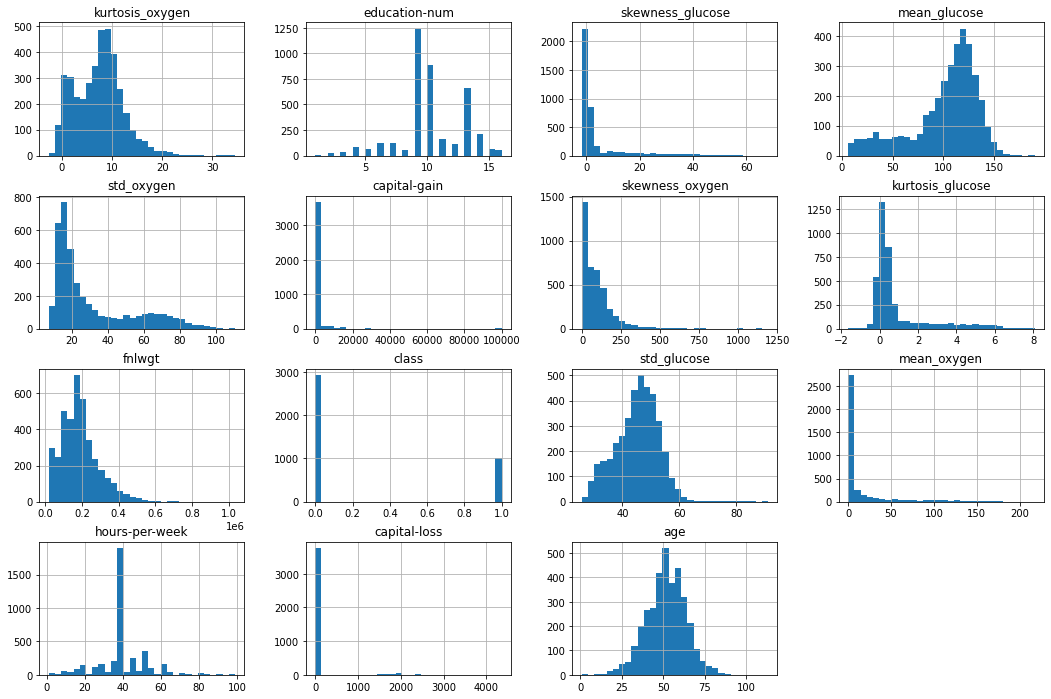

In [75]:
_ = merged_train.select_dtypes(include=[np.number]).hist(figsize=(18, 12), bins=30)

In [76]:
merged_train['kurtosis_oxygen'] = merged_train.kurtosis_oxygen.abs()
merged_train['skewness_glucose'] = merged_train.skewness_glucose.abs()
merged_train['kurtosis_glucose'] = merged_train.kurtosis_glucose.abs()

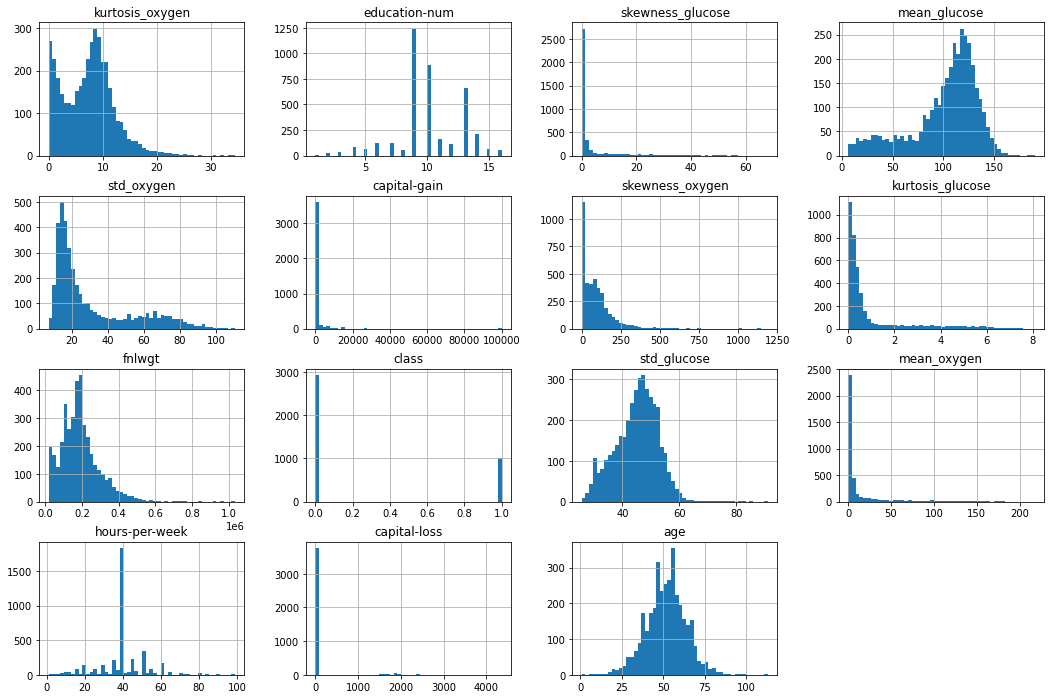

In [77]:
_ = merged_train.select_dtypes(include=[np.number]).hist(figsize=(18, 12), bins=50)

## Replacing missing values <a id='replace'></a>

Missing values will be replaced by Median but also by Linear Regression, these two methods will be compared

### Numerical

In [78]:
merged_train.select_dtypes(include=[np.number]).isnull().sum()

kurtosis_oxygen       0
education-num         0
skewness_glucose      1
mean_glucose        393
std_oxygen            1
capital-gain          1
skewness_oxygen       3
kurtosis_glucose      2
fnlwgt                0
class                 0
std_glucose           0
mean_oxygen           0
hours-per-week        0
capital-loss          0
age                 393
dtype: int64

#### Most Frequency method

Attributes: capital-gain, age

In [79]:
class mostFreq(TransformerMixin):
    def __init__(self, columns):
        self.columns = columns
        self.most_frequency = [0] * len(columns)
        
    def fit(self, dataframe):
        for i in range(len(self.columns)):
            self.most_frequency[i] = dataframe[self.columns[i]].mode()[0]
        return self
    
    def transform(self, data):
        data_other = data.copy()
        for i in range(len(self.columns)):
            data_other[self.columns[i]] = data_other[self.columns[i]].apply(lambda x: self.most_frequency[i] if pd.isna(x) else x)
        return data_other

In [80]:
pipel_most_frequency = Pipeline([('most_frequency', mostFreq(['capital-gain', 'age']))])
fill_frequency = pipel_most_frequency.fit_transform(merged_train)

In [81]:
fill_frequency['capital-gain'].isna().sum()

0

In [82]:
fill_frequency['age'].isna().sum()

0

In [83]:
fill_frequency['capital-gain'].unique()

array([    0.,  5178.,  4101., 27828., 15024.,  7298.,  2964.,  3103.,
        3908.,  2202.,  4416.,  1409., 25236., 10520.,  2174.,  2580.,
       99999., 13550.,  4508.,  4865.,  7688.,  1506.,  4650.,  3674.,
        4386., 14084.,  3137.,  8614.,  2977.,  5013.,  2635., 10605.,
        1797.,  2829.,  3325., 14344.,  3411.,  1055.,  2597.,  4064.,
        2407.,  2228.,  3464.,  7430.,  3781.,  2885.,  2538.,  2062.,
         594.,  2290.,  1111.,  1471.,  3471.,  9562.,  6849.,  3273.,
        6497.,  5060., 20051.,  3942.,  2050.,   114.,  4787.,   914.,
        9386.,  1173.,  6418.,  6514.,  2329.,  3818.,  3887.,  1424.,
       18481.])

In [84]:
fill_frequency['age'].unique()

array([ 48,  63,  36,  44,  54,  56,  38,  53,  59,  67,  43,  46,  55,
        49,  62,  45,  76,  51,  40,  52,  70,  50,  65,  47,  64,  66,
        41,  60,  58,  57,  69,  34,  35,  39,  37,  68,  33,  71,  73,
        84,  30,  42,  32,  31,  29,  75,  80,  27,  23,  20,  61,  28,
        25,  26,  77,  21,  22,  81,  14,  78,  18,  74,  19,  93,  72,
        79,  82,  97,  87,  24,   1,  17,  99,  16, 113,   7,  90,   9,
        83,  15,  86,   3,  85,  12], dtype=int64)

#### Median method

Attributes: skewness_glucose(missing 1), mean_glucose(missing 393), std_oxygen(missing 1), skewness_oxygen(missing 3), kurtosis_glucose(missing 2)

In [85]:
class fillMedian(TransformerMixin):
    def __init__(self, columns):
        self.columns = columns
        self.med = [0] * len(columns)
        
    def fit(self, data, y=None):
        for i in range(len(self.columns)):
            self.med[i] = data[self.columns[i]].median()
            
        return self

    def transform(self, data):
        data_other = data.copy()
        for i in range(len(self.columns)):
            data_other[self.columns[i]] = data_other[self.columns[i]].apply(lambda x: self.med[i] if pd.isna(x) else x)
        return data_other

In [86]:
median_pipeline = Pipeline([('median_fill', fillMedian(['skewness_glucose', 'mean_glucose', 'std_oxygen', 'skewness_oxygen', 'kurtosis_glucose']))])
fill_median = median_pipeline.fit_transform(merged_train)

skewness_glucose - before(mising 1) and after Median

<Axes: >

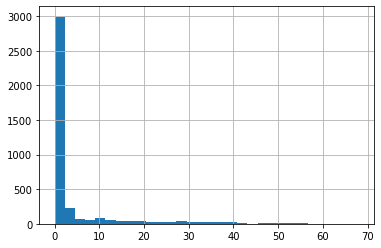

In [87]:
pd.Series(merged_train['skewness_glucose']).hist(bins=30)

<Axes: >

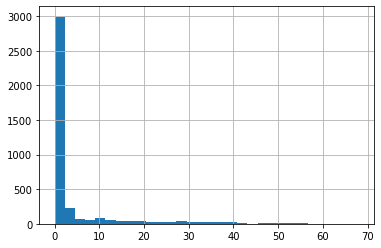

In [88]:
pd.Series(fill_median['skewness_glucose']).hist(bins=30)

mean_glucose - before(missing 393) and after Median

<Axes: >

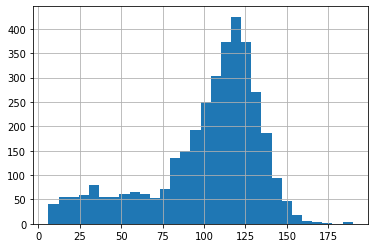

In [89]:
pd.Series(merged_train['mean_glucose']).hist(bins=30)

<Axes: >

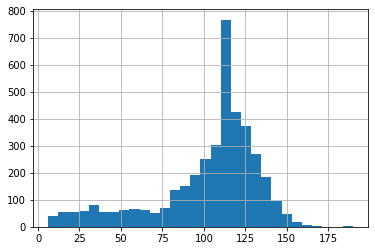

In [90]:
pd.Series(fill_median['mean_glucose']).hist(bins=30)

std_oxygen - before(missing 1) and after Median


<Axes: >

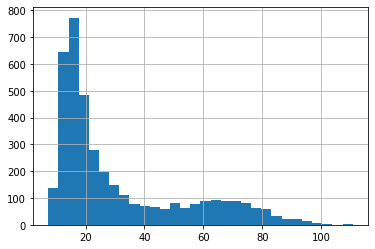

In [91]:
pd.Series(merged_train['std_oxygen']).hist(bins=30)

<Axes: >

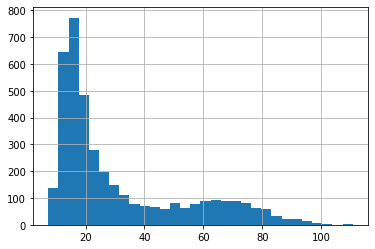

In [92]:
pd.Series(fill_median['std_oxygen']).hist(bins=30)

skewness_oxygen - before(missing 3) and after Median

<Axes: >

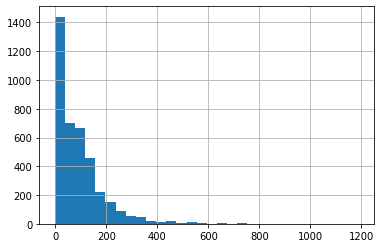

In [93]:
pd.Series(merged_train['skewness_oxygen']).hist(bins=30)

<Axes: >

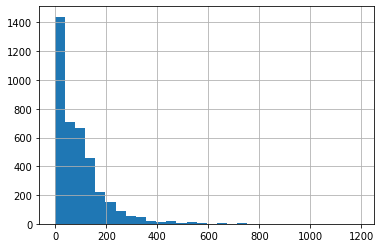

In [94]:
pd.Series(fill_median['skewness_oxygen']).hist(bins=30)

kurtosis_glucose - before(missing 2) and after median

<Axes: >

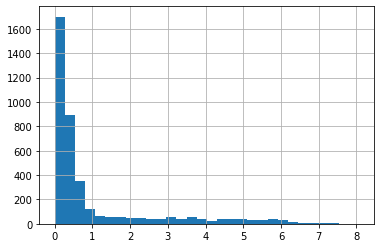

In [95]:
pd.Series(merged_train['kurtosis_glucose']).hist(bins=30)

<Axes: >

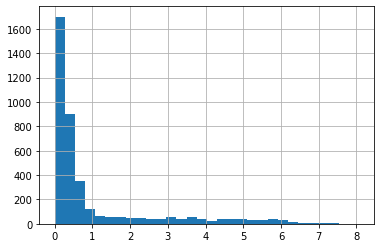

In [96]:
pd.Series(fill_median['kurtosis_glucose']).hist(bins=30)

For the attribute that has missing values(mean_glucose: 393 missing values), we can see from the graphs that after filling with Median, the graph is different

#### Linear Regression method

Attributes: skewness_glucose(missing 1), mean_glucose(missing 393), std_oxygen(missing 1), skewness_oxygen(missing 3), kurtosis_glucose(missing 2)

In [97]:
class linearRegression(TransformerMixin):
    def __init__(self, columns, model):
        self.column = columns
        self.model = model
        

    def fit(self, data, y=None):
        numeric = data.select_dtypes(include=[np.number]).dropna()
        other_numeric = numeric[numeric.columns.difference(self.column, sort = False)]
        specific_numeric = numeric[self.column]
        
        self.columns = other_numeric.columns.values
        self.model.fit(other_numeric, specific_numeric)
        
        return self

    
    def transform(self, data):
        data_other = data.copy()
        for i in range(len(data_other)):
            l = []
            if data_other[self.column].iloc[i].isna().bool():
                for k in range(len(self.columns)):
                    if isinstance(pd.NA, type(data_other[self.columns[k]].iloc[i])):
                        l.append(data_other[self.columns[k]].median()) 
                    elif np.isnan(data_other[self.columns[k]].iloc[i]):
                        l.append(data_other[self.columns[k]].median())
                    else:
                        l.append(data_other[self.columns[k]].iloc[i])
                predict = self.model.predict([l])
                data_other[self.column[0]].iloc[i] = predict                   
        return data_other

In [98]:
data_copy = merged_train.copy()
regression = linear_model.LinearRegression()

skewness_glucose - Median and Linear Regression

In [99]:
regression_pipeline = Pipeline([('linear_regress', linearRegression(['skewness_glucose'], regression))])
fill_linear_regression = regression_pipeline.fit_transform(data_copy)

<Axes: >

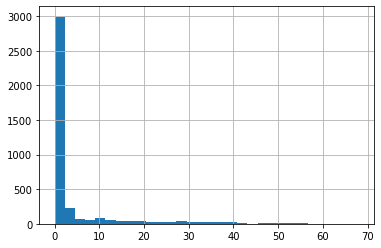

In [100]:
pd.Series(fill_median['skewness_glucose']).hist(bins=30)

<Axes: >

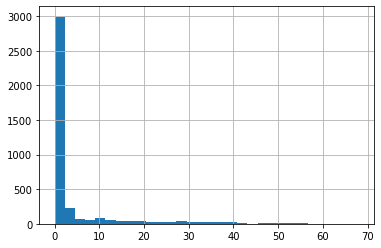

In [101]:
pd.Series(fill_linear_regression['skewness_glucose']).hist(bins=30)

mean_glucose - Median and Linear Regression

In [102]:
regression_pipeline_2 = Pipeline([('linear_regress', linearRegression(['mean_glucose'], regression))])
fill_linear_regression_2 = regression_pipeline_2.fit_transform(data_copy)

<Axes: >

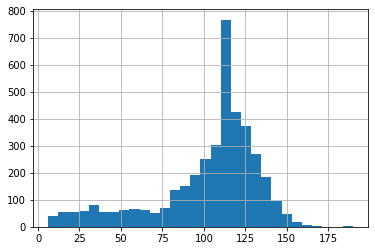

In [103]:
pd.Series(fill_median['mean_glucose']).hist(bins=30)

<Axes: >

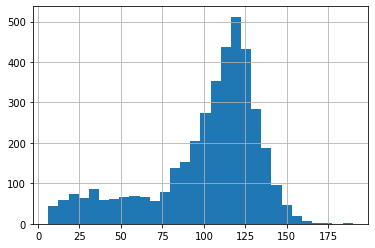

In [104]:
pd.Series(fill_linear_regression_2['mean_glucose']).hist(bins=30)

std_oxygen - Median and Linear Regression

In [105]:
regression_pipeline_3 = Pipeline([('linear_regress', linearRegression(['std_oxygen'], regression))])
fill_linear_regression_3 = regression_pipeline_3.fit_transform(data_copy)

<Axes: >

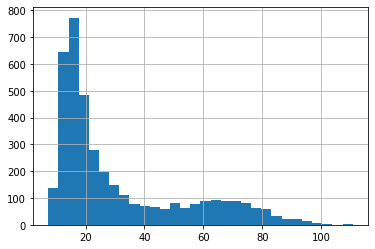

In [106]:
pd.Series(fill_median['std_oxygen']).hist(bins=30)

<Axes: >

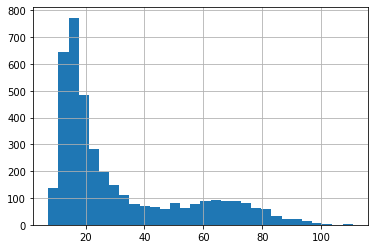

In [107]:
pd.Series(fill_linear_regression_3['std_oxygen']).hist(bins=30)

skewness_oxygen - Median and Linear Regression

In [108]:
regression_pipeline_4 = Pipeline([('linear_regress', linearRegression(['skewness_oxygen'], regression))])
fill_linear_regression_4 = regression_pipeline_4.fit_transform(data_copy)

<Axes: >

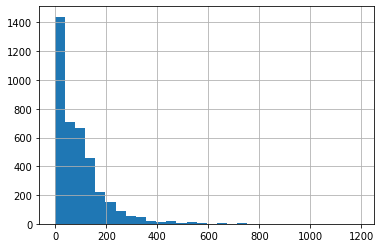

In [109]:
pd.Series(fill_median['skewness_oxygen']).hist(bins=30)

<Axes: >

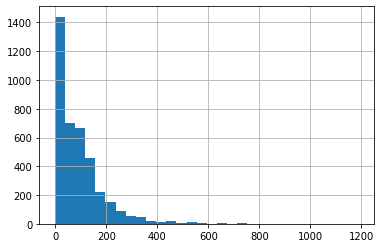

In [110]:
pd.Series(fill_linear_regression_4['skewness_oxygen']).hist(bins=30)

kurtosis_glucose - Median and Linear Regression

In [111]:
regression_pipeline_5 = Pipeline([('linear_regress', linearRegression(['kurtosis_glucose'], regression))])
fill_linear_regression_5 = regression_pipeline_5.fit_transform(data_copy)

<Axes: >

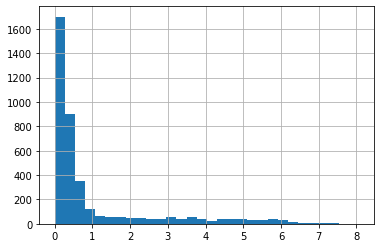

In [112]:
pd.Series(fill_median['kurtosis_glucose']).hist(bins=30)

<Axes: >

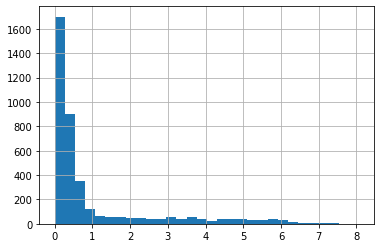

In [113]:
pd.Series(fill_linear_regression_5['kurtosis_glucose']).hist(bins=30)

### Categorical

Attributes: relationship, income, occupation, country, workclass

In [114]:
merged_train.select_dtypes(exclude=[np.number]).isnull().sum()

name                0
address             0
pregnant            0
relationship        2
education           0
income              1
occupation        230
country            60
marital-status      0
workclass         229
sex                 0
date_of_birth       0
dtype: int64

#### Most Frequency method

In [115]:
pipel_most_frequency_categorical = Pipeline([('most_frequency', mostFreq(['relationship', 'income', 'occupation', 'country', 'workclass']))])
fill_frequency_categorical = pipel_most_frequency_categorical.fit_transform(merged_train)

In [116]:
fill_frequency_categorical.select_dtypes(exclude=[np.number]).isnull().sum()

name              0
address           0
pregnant          0
relationship      0
education         0
income            0
occupation        0
country           0
marital-status    0
workclass         0
sex               0
date_of_birth     0
dtype: int64

In [117]:
def plotAttribute(attribute):
    fig, axis = plt.subplots(figsize=(9, 3))
    merged_train[attribute].value_counts().plot(kind='bar')
    axis.set_title("before - " + attribute)
    plt.show()

    fig, axis = plt.subplots(figsize=(9, 3))
    fill_frequency_categorical[attribute].value_counts().plot(kind='bar')
    axis.set_title("after - " + attribute)
    plt.show()

relationship - before and after Most Frequency method

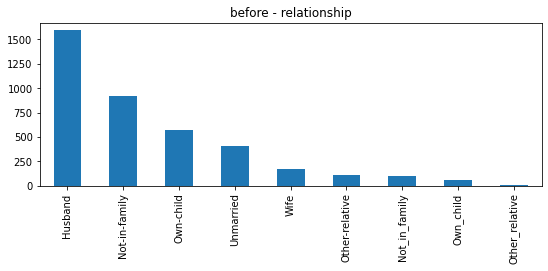

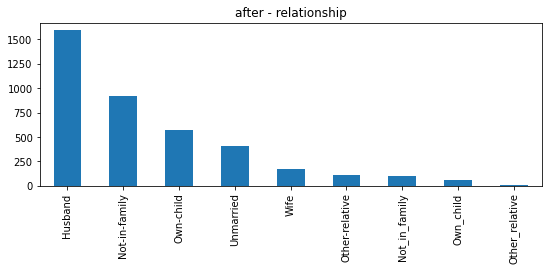

In [118]:
plotAttribute('relationship')

income - before and after Most Frequency method

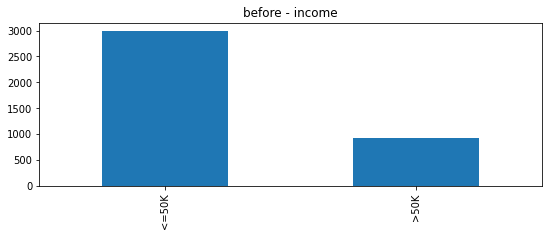

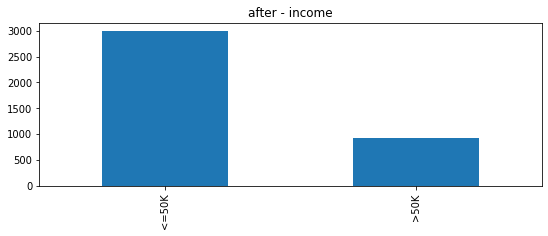

In [119]:
plotAttribute('income')

occupation - before and after Most Frequency method

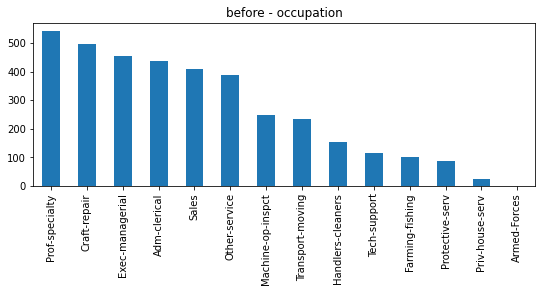

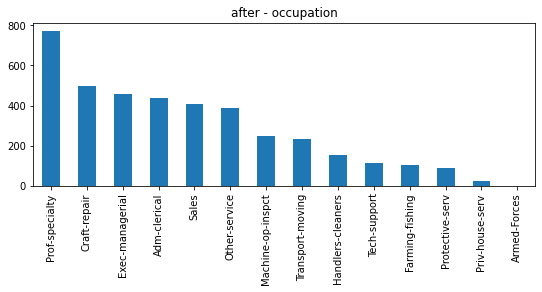

In [120]:
plotAttribute('occupation')

country - before and after Most Frequency method

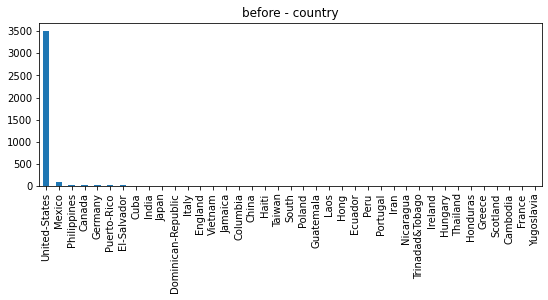

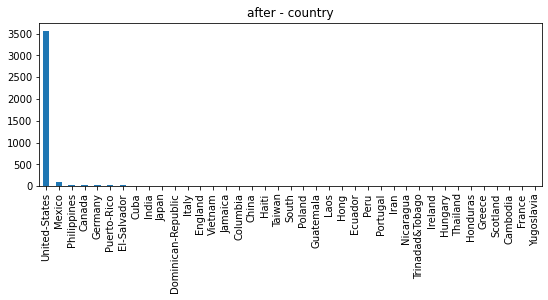

In [121]:
plotAttribute('country')

workclass - before and after Most Frequency method

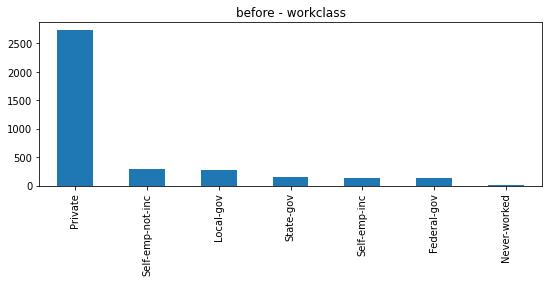

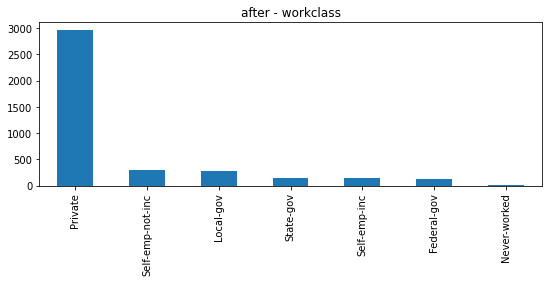

In [122]:
plotAttribute('workclass')

## Normalization and Outliers <a id='normalization'></a>

Normalization focused on two attributes: mean_oxygen and skewness_glucose, check outliers for these attributes and remove them

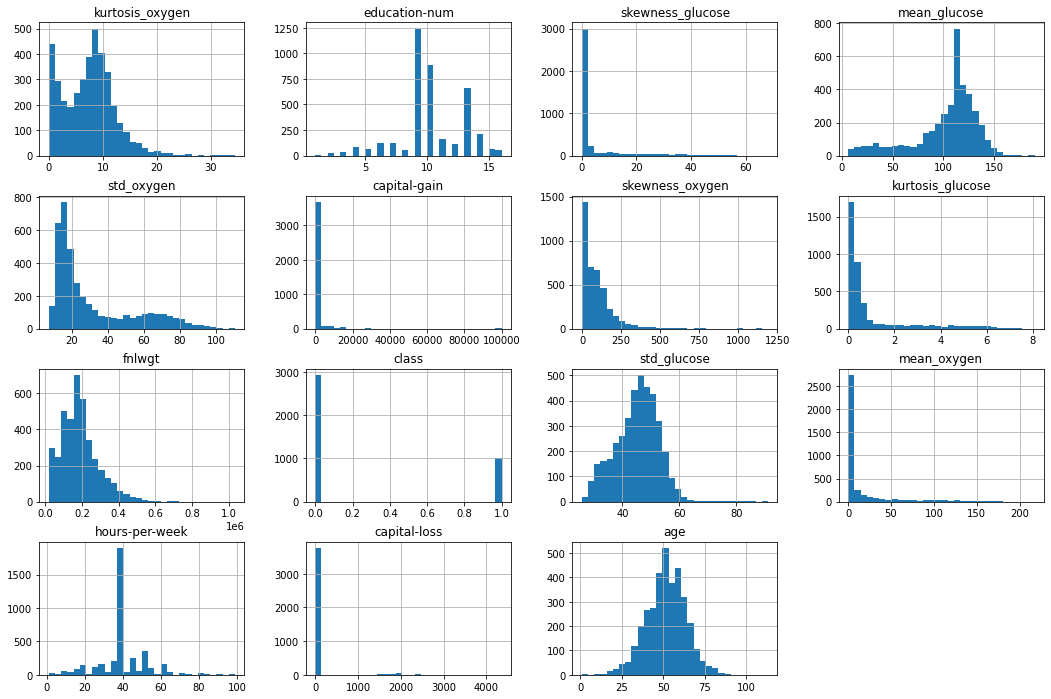

In [123]:
_ = fill_median.select_dtypes(include=[np.number]).hist(figsize=(18, 12), bins=30)

Normalization for mean_oxygen and skewness_glucose

<Axes: xlabel='mean_oxygen'>

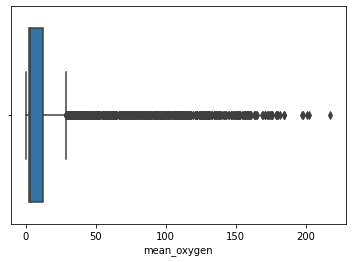

In [124]:
sns.boxplot(fill_median['mean_oxygen'])

<Axes: xlabel='skewness_glucose'>

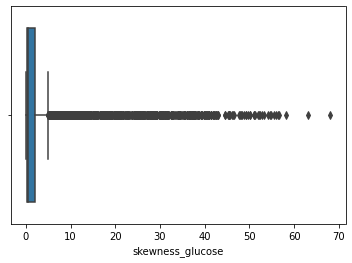

In [125]:
sns.boxplot(fill_median['skewness_glucose'])

### Logarithm method

In [126]:
class log(TransformerMixin):
    def __init__(self, columns):
        self.columns = columns
        self.log = [0] * len(columns)

    def fit(self, data, y=None):
        for i in range(len(self.columns)):
            self.log[i] = np.log(data[self.columns[i]]+2)
        return self

    def transform(self, data):
        data_other = data.copy()
        for i in range(len(self.columns)):
            data_other[self.columns[i]] = self.log[i]
        return data_other

In [127]:
pipeline_log = Pipeline([('logarithm', log(['mean_oxygen', 'skewness_glucose']))])
fill_log = pipeline_log.fit_transform(fill_median)

In [128]:
def histAndBoxPlot(type, attribute, title):
    if type == 'm':
        plt.hist(fill_median[attribute], bins=20)
        plt.title(title)
        plt.show() 
        
        sns.boxplot(fill_median[attribute]).set_title(title)
    elif type == 'l':
        plt.hist(fill_log[attribute], bins=20)
        plt.title(title)
        plt.show() 
        
        sns.boxplot(fill_log[attribute]).set_title(title)

#### mean_oxygen

before and after normalization

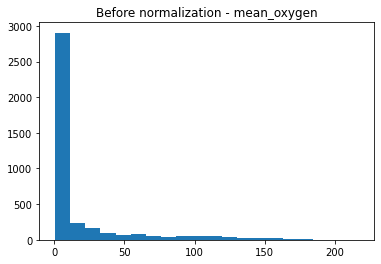

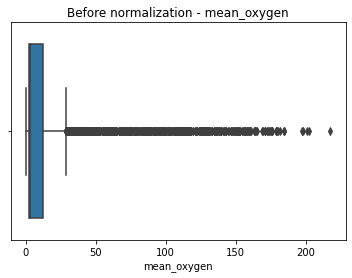

In [129]:
histAndBoxPlot('m', 'mean_oxygen', 'Before normalization - mean_oxygen')

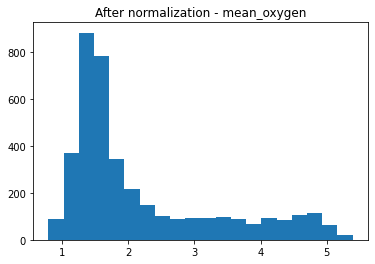

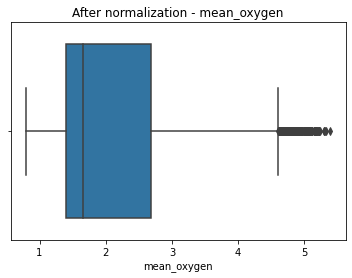

In [130]:
histAndBoxPlot('l', 'mean_oxygen', 'After normalization - mean_oxygen')

In [131]:
print("Skewness:", stats.skew(fill_log['mean_oxygen']))

Skewness: 1.2315089376318797


In [132]:
describe = (fill_log['mean_oxygen']).describe()
whisker_r = np.min([describe['max'], describe['75%'] + (1.5 * (describe['75%'] - describe['25%']))])
whisker_l = np.max([describe['min'], describe['25%'] - (1.5 * (describe['75%'] - describe['25%']))])

In [133]:
print("Lower: ", whisker_l)
print("Upper: ", whisker_r)
print("Values below lower quartile:", sum(fill_log['mean_oxygen'] < whisker_l))
print("Values above upper quartile:", sum(fill_log['mean_oxygen'] > whisker_r))

Lower:  0.7944442675623875
Upper:  4.604201871327673
Values below lower quartile: 0
Values above upper quartile: 240


#### skewness_glucose

before and after normalization

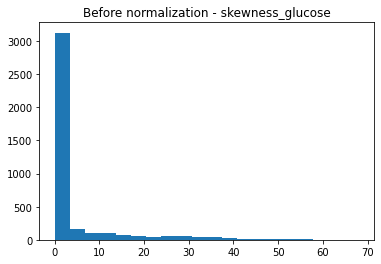

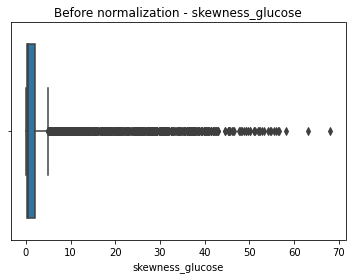

In [134]:
histAndBoxPlot('m', 'skewness_glucose', 'Before normalization - skewness_glucose')

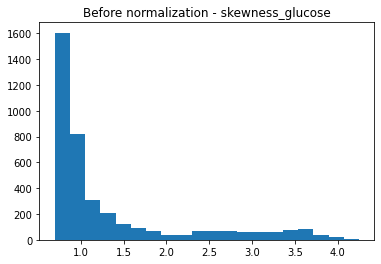

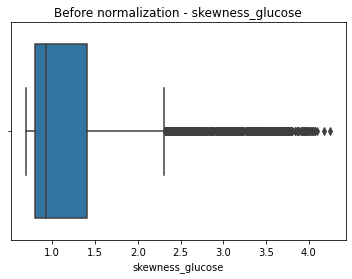

In [135]:
histAndBoxPlot('l', 'skewness_glucose', 'Before normalization - skewness_glucose')

In [136]:
print("Skewness:", stats.skew(fill_log['skewness_glucose']))

Skewness: 1.6957440359725129


In [137]:
describe = (fill_log['skewness_glucose']).describe()
whisker_r = np.min([describe['max'], describe['75%'] + (1.5 * (describe['75%'] - describe['25%']))])
whisker_l = np.max([describe['min'], describe['25%'] - (1.5 * (describe['75%'] - describe['25%']))])

In [138]:
print("Lower: ", whisker_l)
print("Upper: ", whisker_r)
print("Values below lower quartile:", sum(fill_log['mean_oxygen'] < whisker_l))
print("Values above upper quartile:", sum(fill_log['mean_oxygen'] > whisker_r))

Lower:  0.6932012375988372
Upper:  2.312666384749697
Values below lower quartile: 0
Values above upper quartile: 1154


### Remove outliers

Remove outliers for mean_oxygen and skewness_glucose

In [139]:
class removeOutliers(TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, data, y=None):
        return self

    def transform(self, data):
        data_other = data.copy()
        for i in range(len(self.columns)):                 
            data_other[self.columns[i]] = np.clip(data_other[self.columns[i]], data_other[self.columns[i]].quantile(0.05), data_other[self.columns[i]].quantile(0.95))
        
        return data_other

In [140]:
pipeline_outliers = Pipeline([('del_outliers', removeOutliers(['mean_oxygen', 'skewness_glucose']))])
fill_outliers = pipeline_outliers.fit_transform(fill_log)

In [141]:
def histAndBoxPlotOutliers(type, attribute, title):
    if type == 'm':
        plt.hist(fill_median[attribute], bins=20)
        plt.title(title)
        plt.show() 
        
        sns.boxplot(fill_median[attribute]).set_title(title)
    elif type == 'r':
        plt.hist(fill_outliers[attribute], bins=20)
        plt.title(title)
        plt.show() 
        
        sns.boxplot(fill_outliers[attribute]).set_title(title)
    

#### mean_oxygen

before and after outliers

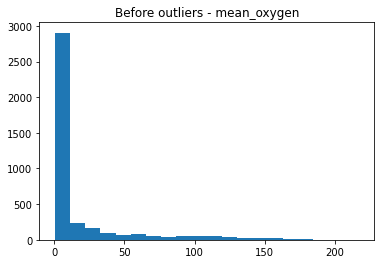

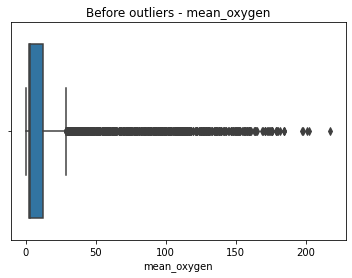

In [142]:
histAndBoxPlotOutliers('m', 'mean_oxygen', 'Before outliers - mean_oxygen')

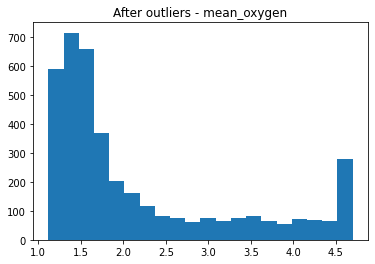

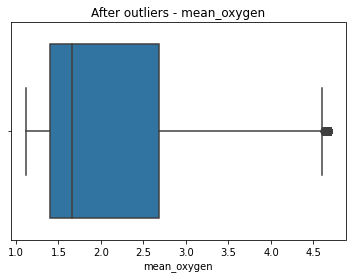

In [143]:
histAndBoxPlotOutliers('r', 'mean_oxygen', 'After outliers - mean_oxygen')

In [144]:
print("Skewness:", stats.skew(fill_outliers['mean_oxygen']))

Skewness: 1.1888952961658685


In [145]:
describe = (fill_outliers['mean_oxygen']).describe()
whisker_r = np.min([describe['max'], describe['75%'] + (1.5 * (describe['75%'] - describe['25%']))])
whisker_l = np.max([describe['min'], describe['25%'] - (1.5 * (describe['75%'] - describe['25%']))])

In [146]:
print("Lower: ", whisker_l)
print("Upper: ", whisker_r)
print("Values below lower quartile:", sum(fill_outliers['mean_oxygen'] < whisker_l))
print("Values above upper quartile:", sum(fill_outliers['mean_oxygen'] > whisker_r))

Lower:  1.1178791373954131
Upper:  4.604201871327673
Values below lower quartile: 0
Values above upper quartile: 240


#### skewness_glucose

before and after outliers

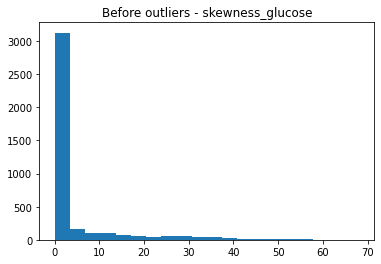

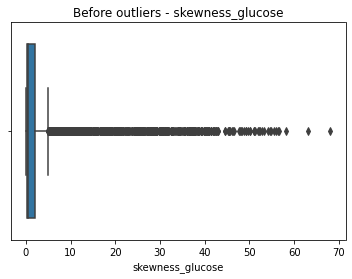

In [147]:
histAndBoxPlotOutliers('m', 'skewness_glucose', 'Before outliers - skewness_glucose')

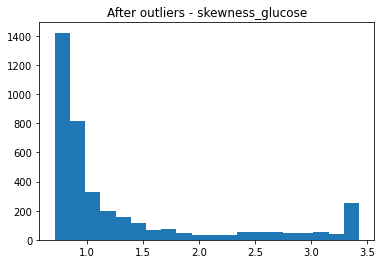

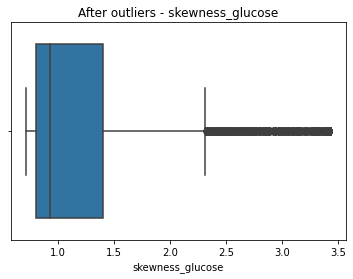

In [148]:
histAndBoxPlotOutliers('r', 'skewness_glucose', 'After outliers - skewness_glucose')

In [149]:
print("Skewness:", stats.skew(fill_outliers['skewness_glucose']))

Skewness: 1.6018606002964755


In [150]:
describe = (fill_outliers['skewness_glucose']).describe()
whisker_r = np.min([describe['max'], describe['75%'] + (1.5 * (describe['75%'] - describe['25%']))])
whisker_l = np.max([describe['min'], describe['25%'] - (1.5 * (describe['75%'] - describe['25%']))])

In [151]:
print("Lower: ", whisker_l)
print("Upper: ", whisker_r)
print("Values below lower quartile:", sum(fill_outliers['skewness_glucose'] < whisker_l))
print("Values above upper quartile:", sum(fill_outliers['skewness_glucose'] > whisker_r))

Lower:  0.7147059944643093
Upper:  2.312666384749697
Values below lower quartile: 0
Values above upper quartile: 613


## Exploratory analysis <a id='analysis'></a>

Numerical attributes, focus on attributes: mean_oxygen, mean_glucose and skewness_glucose

fill_median - missing values ​​are filled with the median

fill_linear_regression for skewness_glucose

fill_linear_regression_2 for mean_glucose - this attribute has the most mising values(393)


Normalized data and data with removed outliers

fill_log for kurtosis_oxygen and mean_oxygen using logarithm

fill_outliers for kurtosis_oxygen and mean_oxygen by replacing outliers ​​with the 5 or 95 percentile



Categorical attributes

fill_freq for categorical attributes replaced values with Most Frequency method

Pairplot for original data

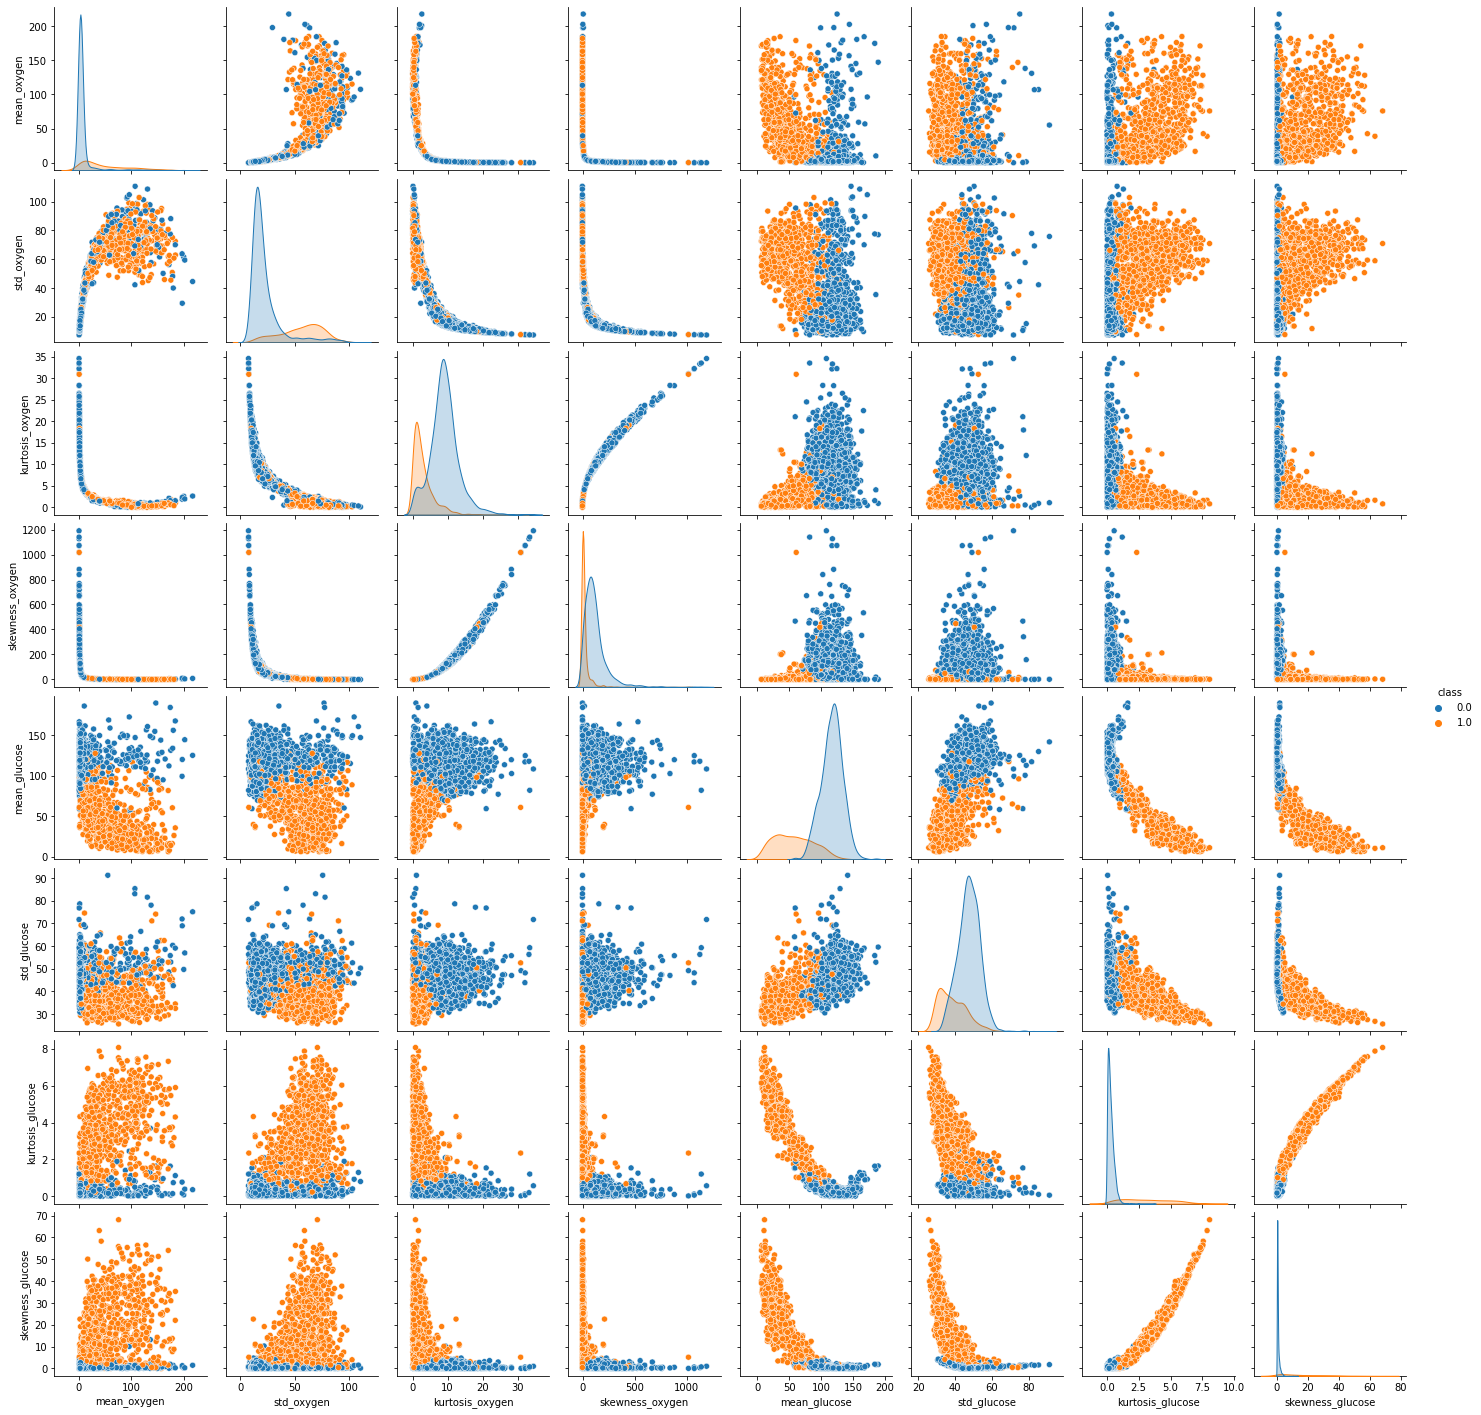

In [152]:
sns.pairplot(merged_train ,vars = ['mean_oxygen', 'std_oxygen', 'kurtosis_oxygen', 'skewness_oxygen','mean_glucose', 'std_glucose', 'kurtosis_glucose', 'skewness_glucose'], hue='class')

Pairplot for filled values ​​using Median

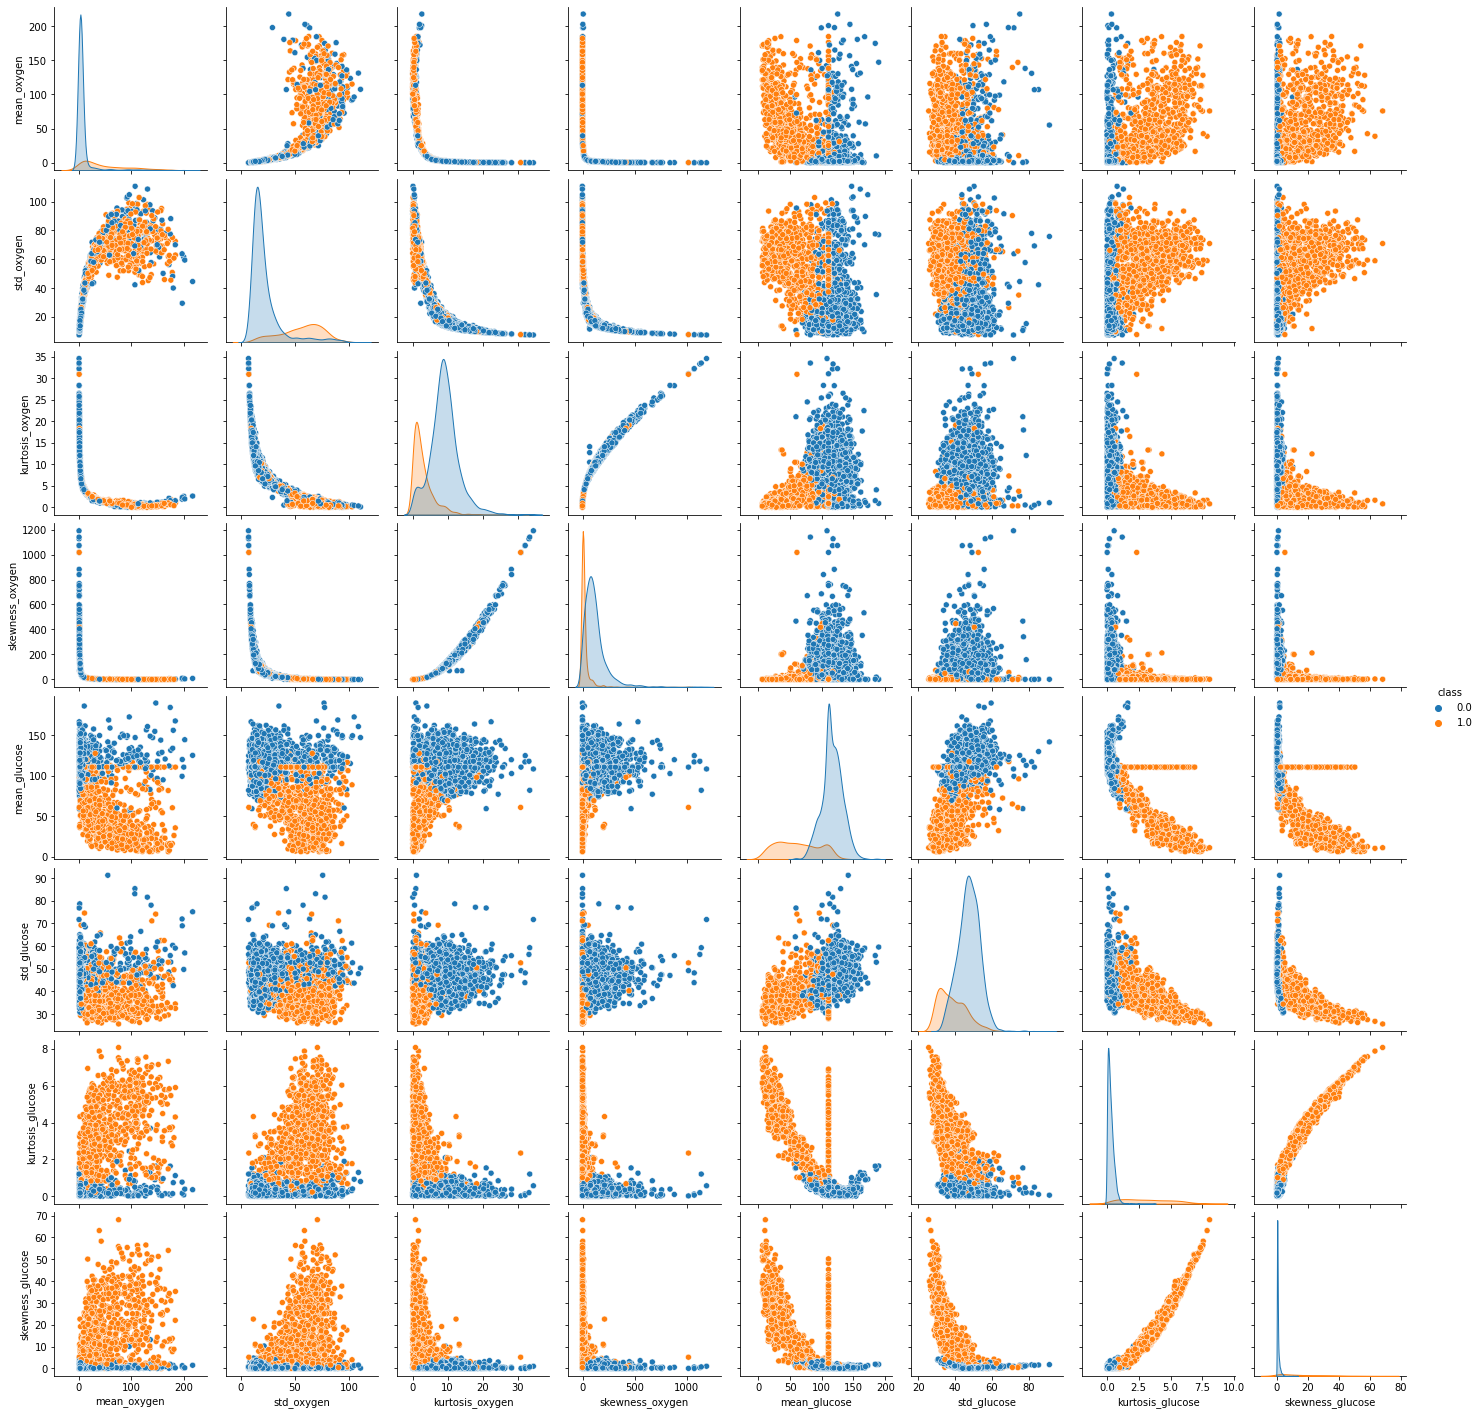

In [153]:
sns.pairplot(fill_median ,vars = ['mean_oxygen', 'std_oxygen', 'kurtosis_oxygen', 'skewness_oxygen','mean_glucose', 'std_glucose', 'kurtosis_glucose', 'skewness_glucose'], hue='class')

Pairplot for filled values ​​using Linear Regression - skewness_glucose

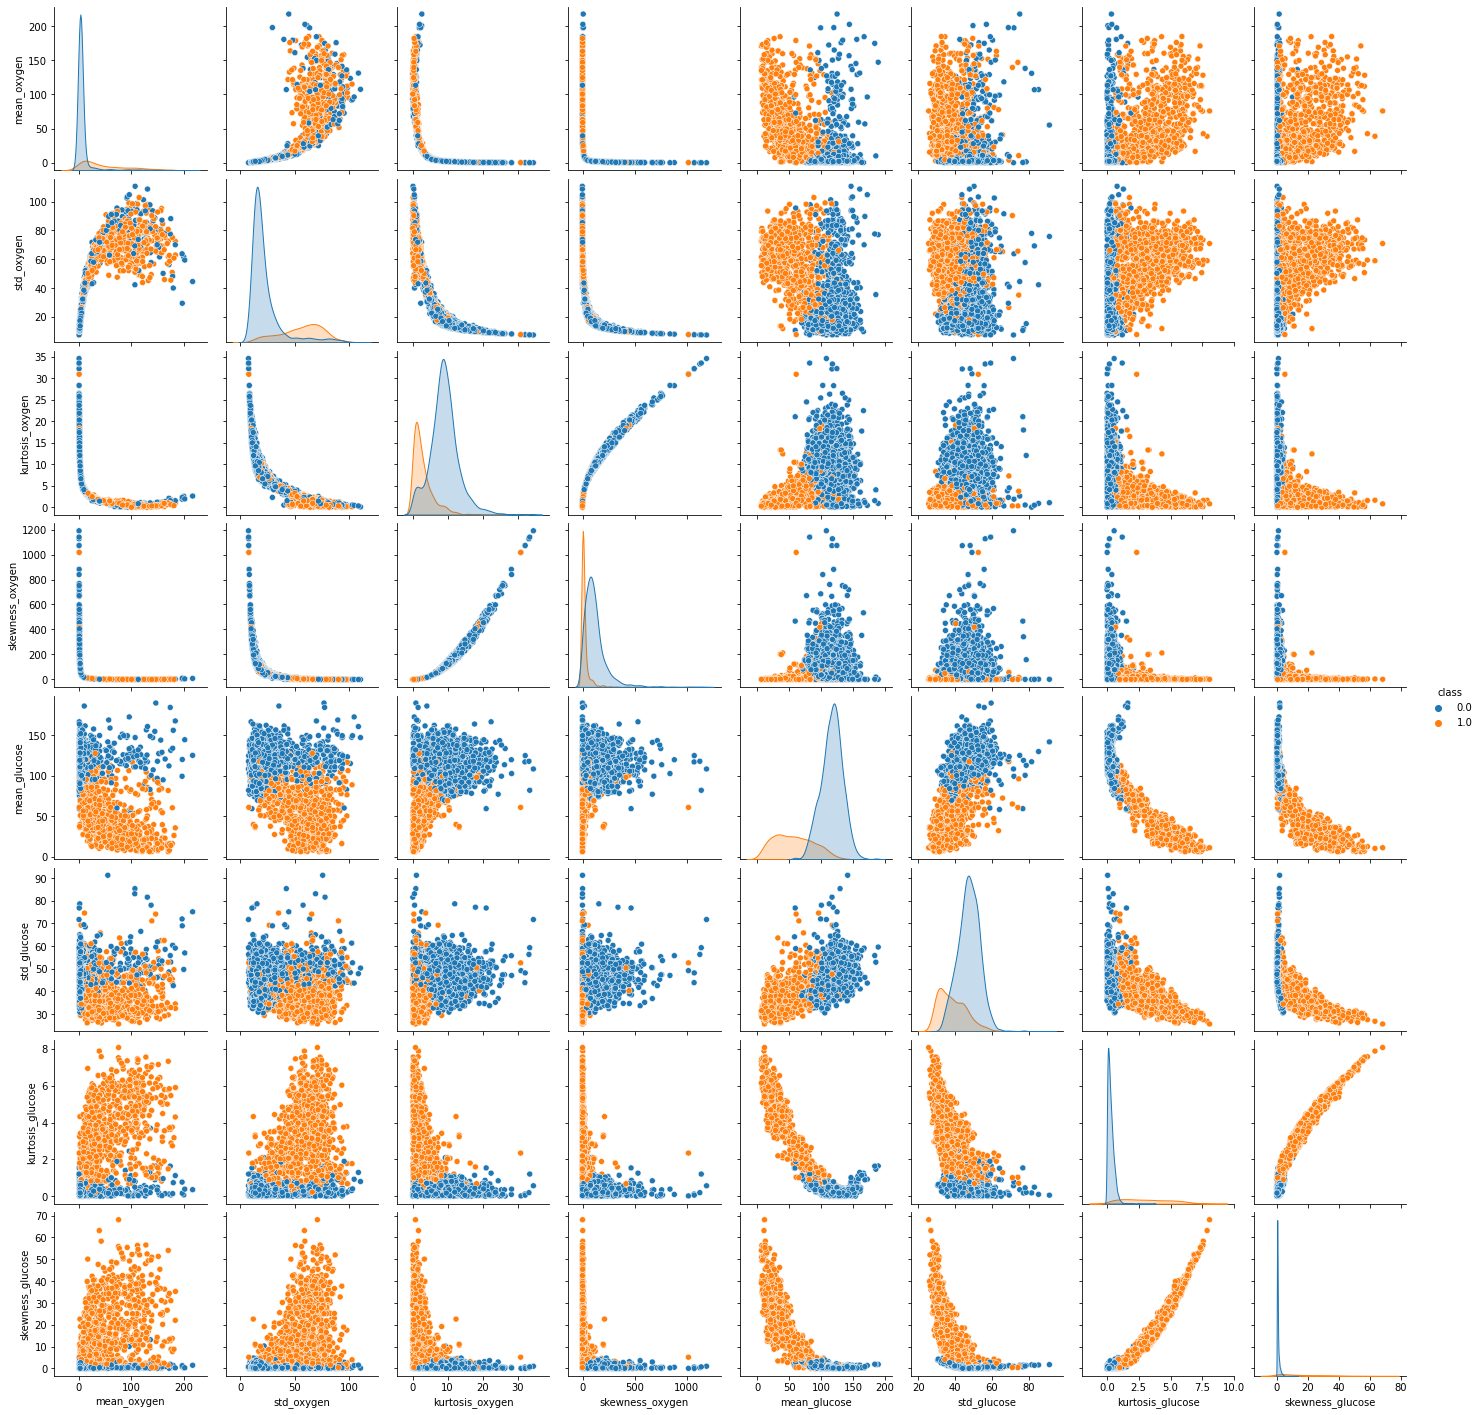

In [154]:
sns.pairplot(fill_linear_regression ,vars = ['mean_oxygen', 'std_oxygen', 'kurtosis_oxygen', 'skewness_oxygen','mean_glucose', 'std_glucose', 'kurtosis_glucose', 'skewness_glucose'], hue='class')

Pairplot for filled values ​​using Linear Regression - mean_glucose

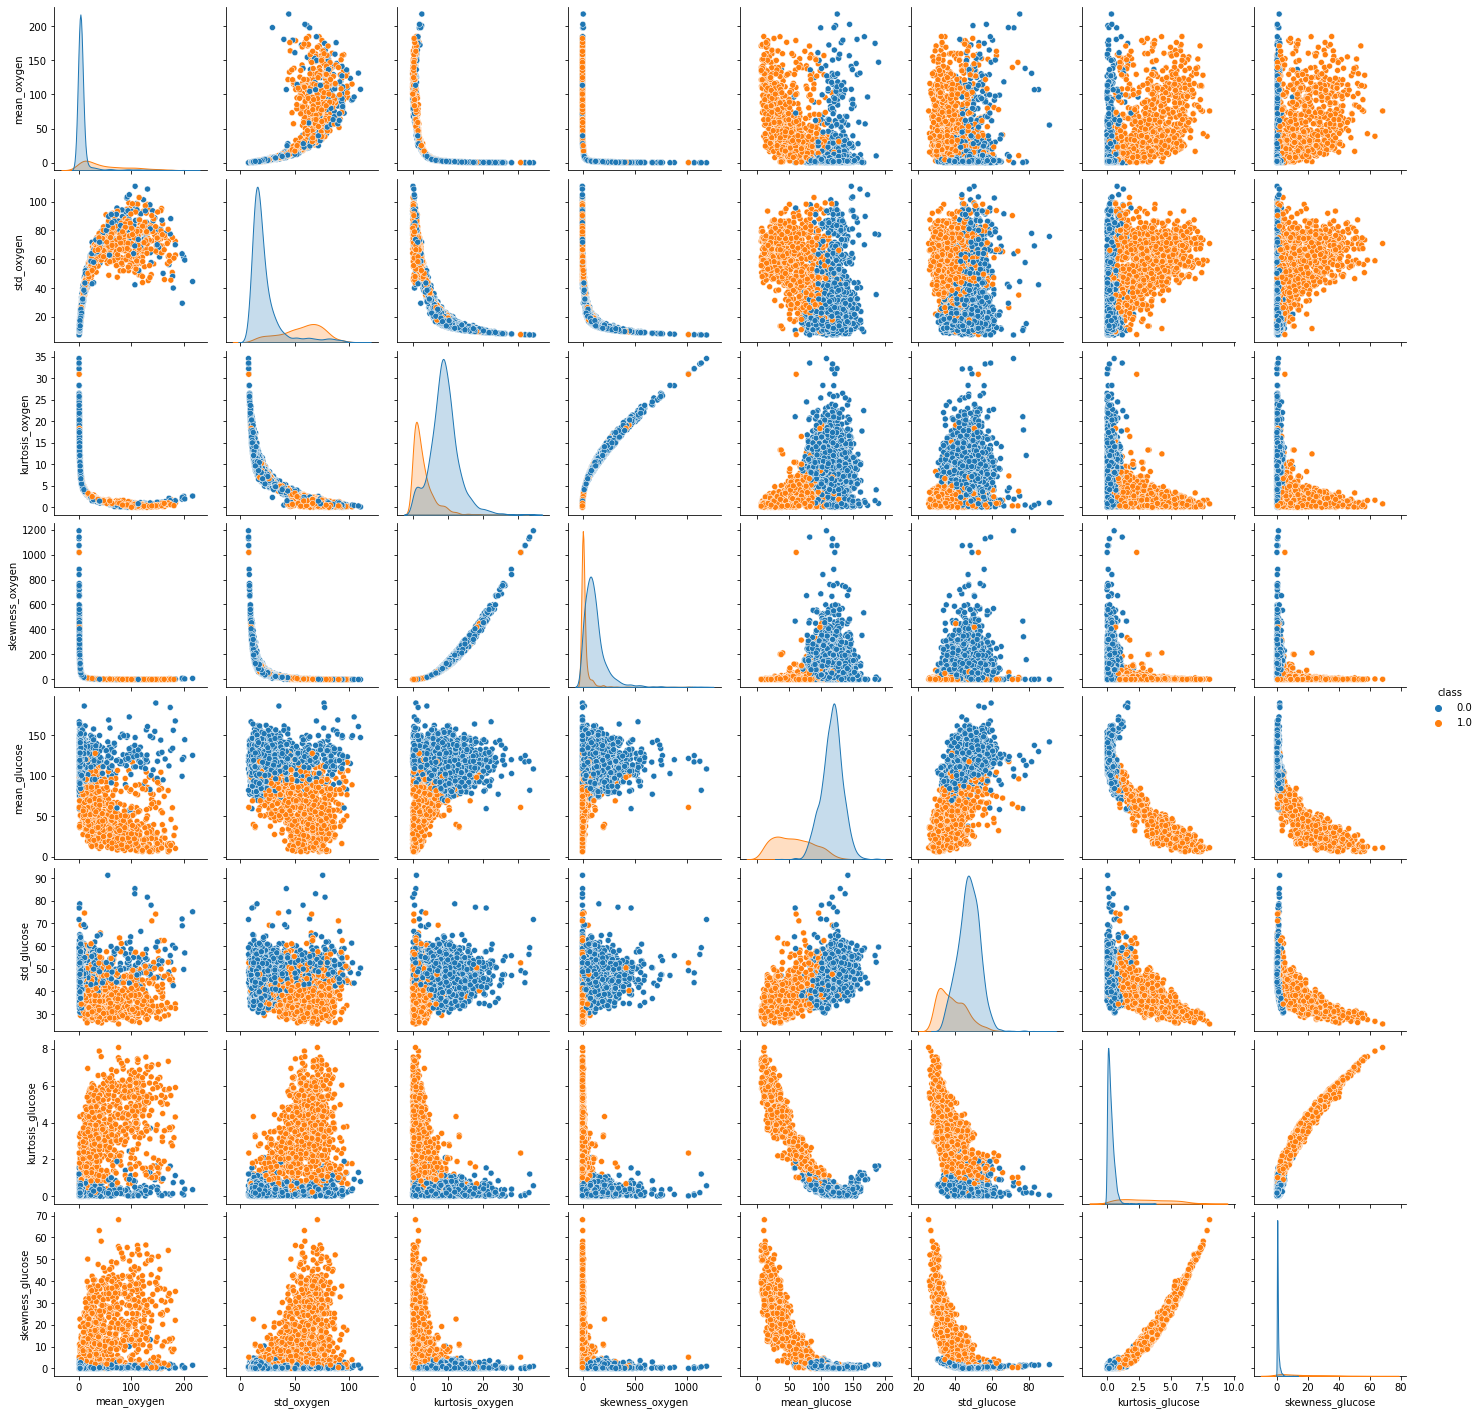

In [155]:
sns.pairplot(fill_linear_regression_2 ,vars = ['mean_oxygen', 'std_oxygen', 'kurtosis_oxygen', 'skewness_oxygen','mean_glucose', 'std_glucose', 'kurtosis_glucose', 'skewness_glucose'], hue='class')

Pairplot for normalized attributes - kurtosis_oxygen and mean_oxygen

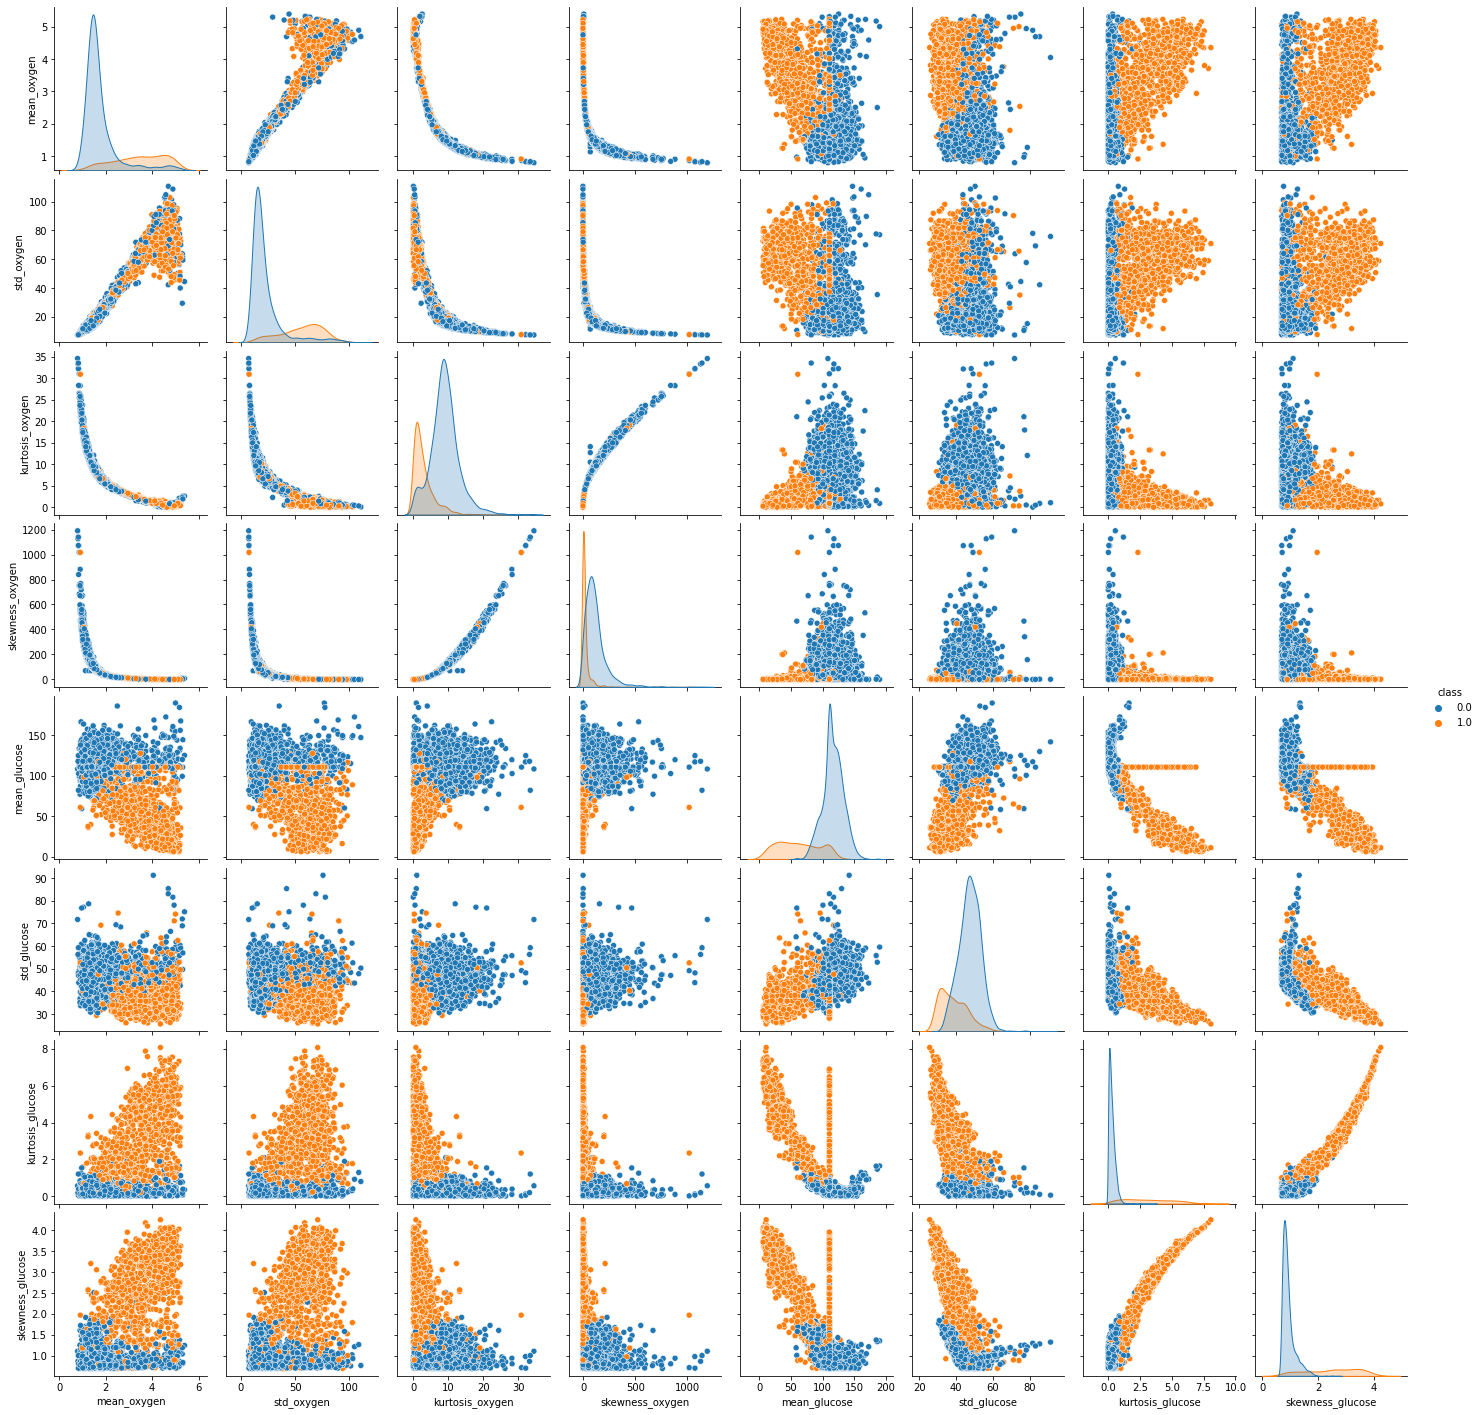

In [156]:
sns.pairplot(fill_log ,vars = ['mean_oxygen', 'std_oxygen', 'kurtosis_oxygen', 'skewness_oxygen','mean_glucose', 'std_glucose', 'kurtosis_glucose', 'skewness_glucose'], hue='class')

Pairplot for remove outliers for attributes - kurtosis_oxygen and mean_oxygen

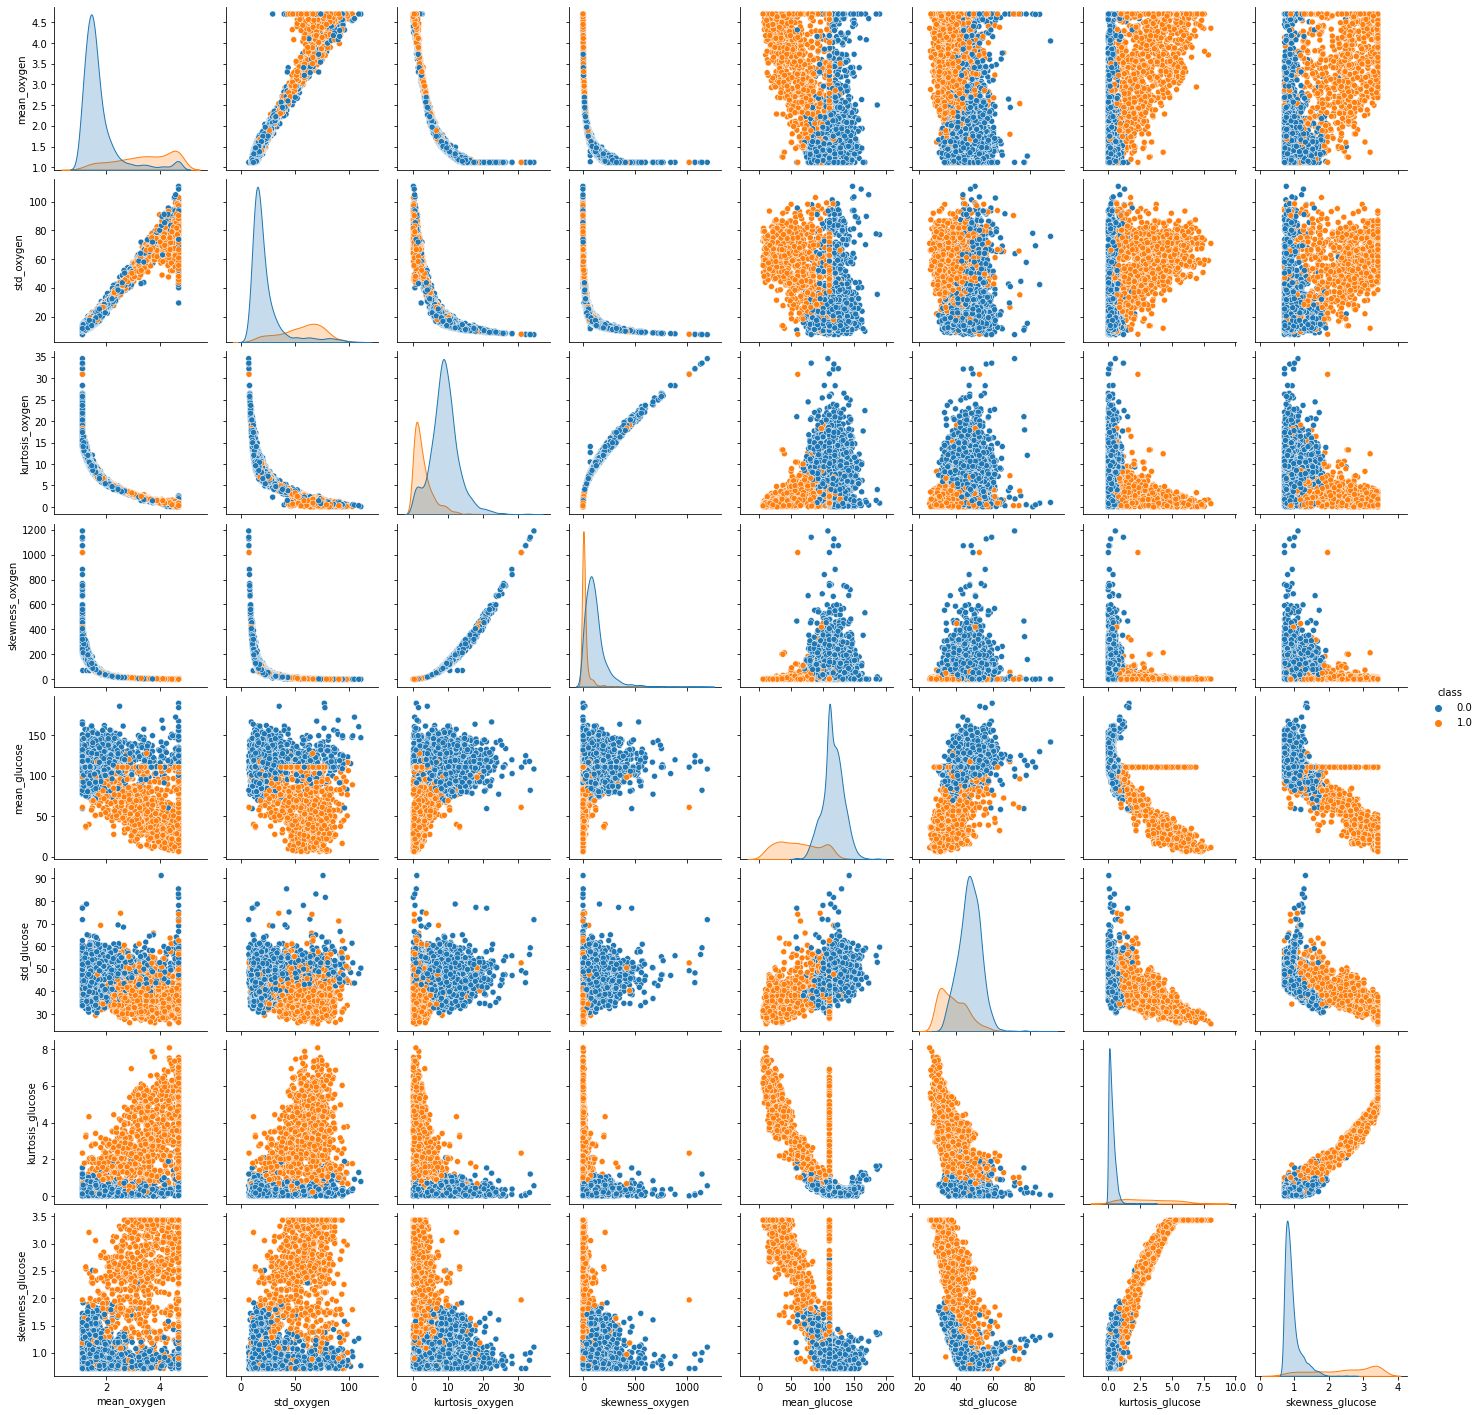

In [157]:
sns.pairplot(fill_outliers ,vars = ['mean_oxygen', 'std_oxygen', 'kurtosis_oxygen', 'skewness_oxygen','mean_glucose', 'std_glucose', 'kurtosis_glucose', 'skewness_glucose'], hue='class')

In [158]:
def createPlot(attribute, data1, data2, title1, title2):
    fig, axis = plt.subplots(ncols=2, sharex= True, sharey=False, figsize=(10, 5))

    data1[attribute].plot.hist(ax =axis[0])
    data2[attribute].plot.hist(ax =axis[1])

    axis[0].set_title(attribute + ' ' + title1)
    axis[1].set_title(attribute + ' with Median')

    plt.show()

    fig1, axis1 = plt.subplots(ncols=2, sharex= True, sharey=False, figsize=(10, 5))

    sns.distplot(data1[attribute], bins = 30, ax = axis1[0])
    sns.distplot(data2[attribute], bins = 30, ax = axis1[1])

    axis1[0].set_title(attribute + ' ' + title1)
    axis1[1].set_title(attribute + ' ' + title2)

    plt.show()    

#### Comparing attributes - values ​​filled using Median and original data

mean_glucose

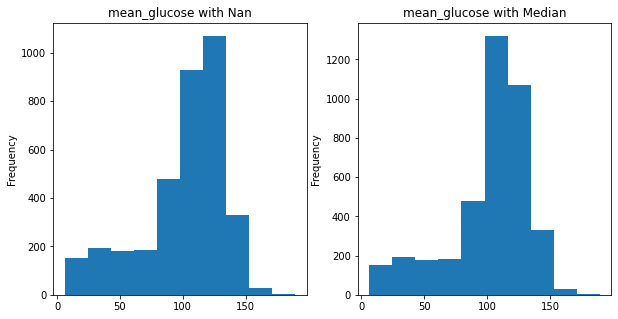

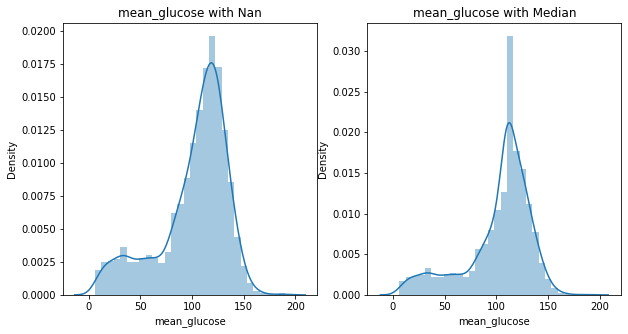

In [159]:
createPlot('mean_glucose', merged_train, fill_median, 'with Nan', 'with Median')

#### Comparing attributes - values ​​filled using Linear Regression and original data

mean_glucose

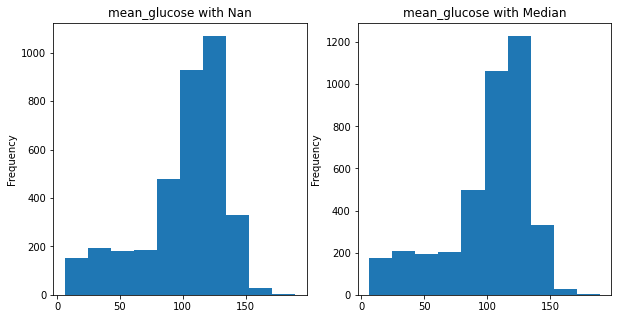

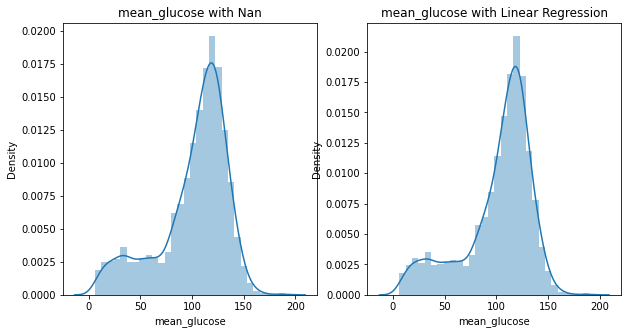

In [160]:
createPlot('mean_glucose', merged_train, fill_linear_regression_2, 'with Nan', 'with Linear Regression')

### Median vs. Linear Regression

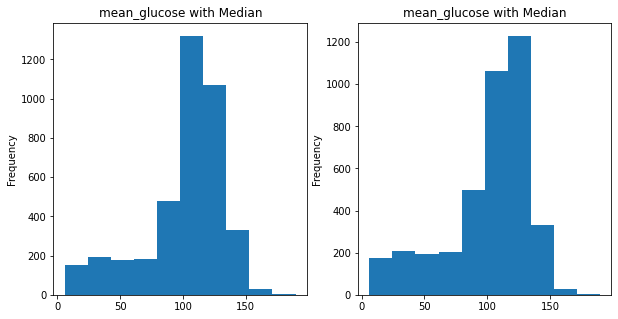

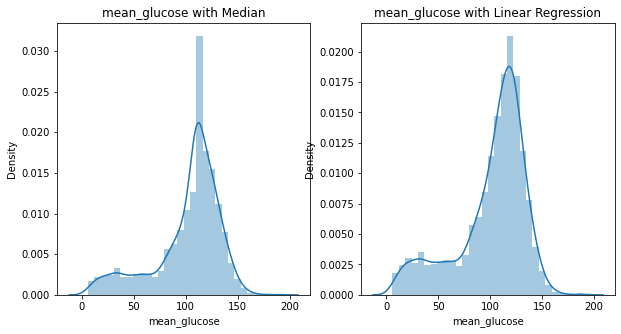

In [161]:
createPlot('mean_glucose', fill_median, fill_linear_regression_2, 'with Median', 'with Linear Regression')

### Attributes with NaN values ​​replaced by Most Frequency method

In [162]:
def getAttributeInfo(attribute):
    print("Attribute " + attribute)
    print("Number of NaN values in original data: ", merged_train[attribute].isnull().sum())
    print("Number of NaN values in filled data: ", fill_frequency_categorical[attribute].isnull().sum())

    fig, axis = plt.subplots(ncols=2, sharex= True, sharey=False, figsize=(10, 5))

    merged_train[attribute].value_counts().plot(kind='bar', ax =axis[0])
    fill_frequency_categorical[attribute].value_counts().plot(kind='bar',ax =axis[1])

    axis[0].set_title('Before')
    axis[1].set_title('After')
    plt.show()

    print("Original data")
    print(merged_train[attribute].describe())
    print()
    print("Filled data")
    print(fill_frequency_categorical[attribute].describe())
    

In [163]:
merged_train.select_dtypes(exclude=[np.number]).isna().sum()

name                0
address             0
pregnant            0
relationship        2
education           0
income              1
occupation        230
country            60
marital-status      0
workclass         229
sex                 0
date_of_birth       0
dtype: int64


ocupation 

before and after

Attribute occupation
Number of NaN values in original data:  230
Number of NaN values in filled data:  0


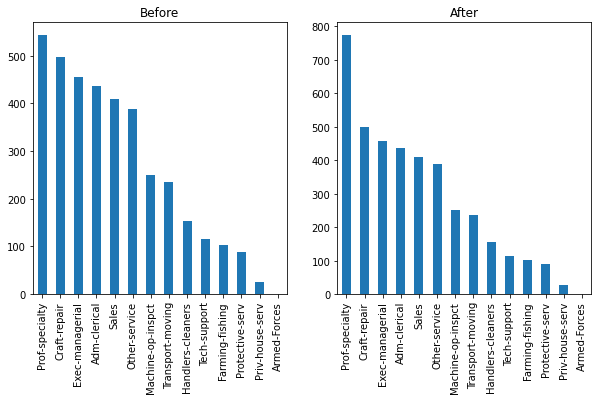

Original data
count               3703
unique                14
top       Prof-specialty
freq                 543
Name: occupation, dtype: object

Filled data
count               3933
unique                14
top       Prof-specialty
freq                 773
Name: occupation, dtype: object


In [164]:
getAttributeInfo('occupation')

country 

before and after

Attribute country
Number of NaN values in original data:  60
Number of NaN values in filled data:  0


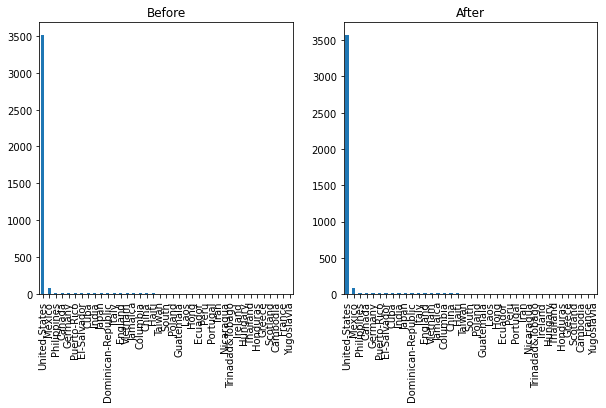

Original data
count              3873
unique               39
top       United-States
freq               3508
Name: country, dtype: object

Filled data
count              3933
unique               39
top       United-States
freq               3568
Name: country, dtype: object


In [165]:
getAttributeInfo('country')

workclass

before and after

Attribute workclass
Number of NaN values in original data:  229
Number of NaN values in filled data:  0


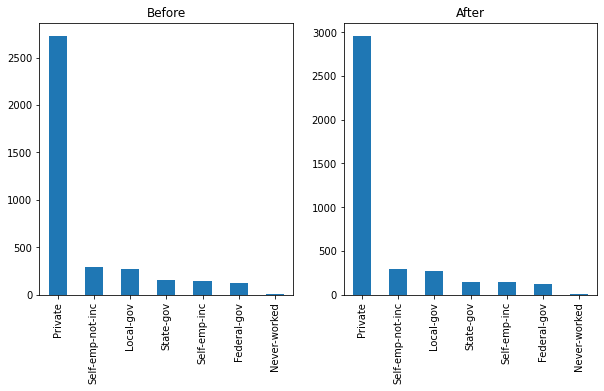

Original data
count        3704
unique          7
top       Private
freq         2731
Name: workclass, dtype: object

Filled data
count        3933
unique          7
top       Private
freq         2960
Name: workclass, dtype: object


In [166]:
getAttributeInfo('workclass')

relationship

before and after

Attribute relationship
Number of NaN values in original data:  2
Number of NaN values in filled data:  0


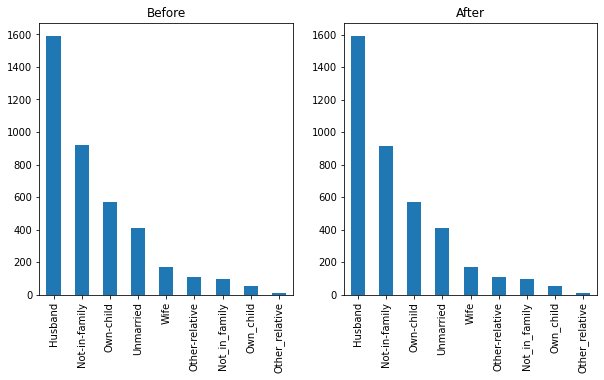

Original data
count        3931
unique          9
top       Husband
freq         1590
Name: relationship, dtype: object

Filled data
count        3933
unique          9
top       Husband
freq         1592
Name: relationship, dtype: object


In [167]:
getAttributeInfo('relationship')

income

before and after

Attribute income
Number of NaN values in original data:  1
Number of NaN values in filled data:  0


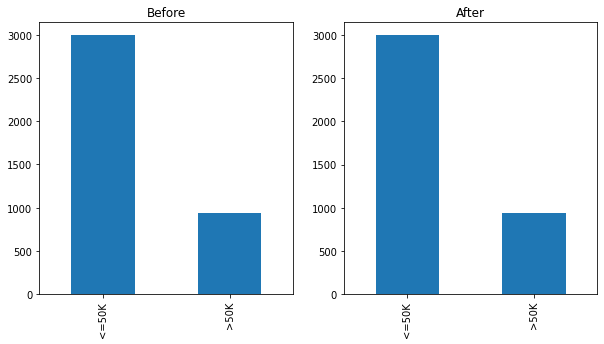

Original data
count      3932
unique        2
top       <=50K
freq       2997
Name: income, dtype: object

Filled data
count      3933
unique        2
top       <=50K
freq       2998
Name: income, dtype: object


In [168]:
getAttributeInfo('income')